# Bank Customer Churn

## Table of contents
---------------------------------------------
* Project Methodology  
    - 1. Import CPU Python Libraries 
    - 2. Function Helper
    - 3. Import Dataset & Data Description
    - 4. Data Understanding
    - 5. Select the Featurs
    - 6. Data Pre-Processing
    - 7. Exploratory Data Analysis
    - 8. Data Transformation
    - 9. Feature Selection
    - 10. Feature Engineering 
    - 11. Statistics
    - 12. Resampling Data
    - 13. Data Splitting 
    - 14. Machine Learning Models 
    - 15. Accuracy Score Summary 
---------------------------------------------

## Methodology  

* 01. Import CPU Python Libraries 
--------------------------------------
* 02. Function Helper
--------------------------------------
* 03. Import Dataset & Data Description
        - Import CSV File
        - Data Description
--------------------------------------
* 04. Data Understanding
        - Data Information
        - Data Summary Statistic
        - Data Variance
--------------------------------------
* 05. Select the Featurs
--------------------------------------
* 06. Data Pre-Processing
        -  Drop Variables 
        - Convert Data Type
        - Missing Value
--------------------------------------
* 07. Exploratory Data Analysis
        - DV Visualization
        - Categorical IDV
        - Categorical IDV With DV
        - Numerical IDV
        - Numerical IDV With DV
--------------------------------------
* 08. Data Transformation
        - Minmax Scale
--------------------------------------
* 9. Feature Selection
        - Wrapper - Forward
--------------------------------------
* 10. Feature Engineering 
        - LableEncoder
--------------------------------------
* 11. Statistics
        - Correlations IDV with DV
        - Correlation between all the Variables
--------------------------------------
* 12. Resampling Data
        - SMOTE
--------------------------------------
* 13. Data Splitting 
--------------------------------------
* 14. Standard Machine Learning Models 
        - Build the Models 'Train the Models'
        -        Random Forest Classifier
        -        Gradient Boosting Classifier
        -        Histogram-based Gradient Boosting Classification Tree
        -        AdaBoost Classifier
        -        Extra Trees Classifier
        -        K Neighbors Classifier
        -        Naive Bayes Classifiers
        -        Naive Bayes Classifier for Multivariate Bernoulli
        -        Decision Tree Classifier
        -        Logistic Regression Classifier
        -        Logistic Regression CV Classifier
        -        Stochastic Gradient Descent Classifier
        -        Linear Perceptron Classifier
        -        XGBoost Classifiers
        -        Support Vector Machines Classifiers
        -        Linear Support Vector Classification
        -        Multilayer Perceptron Classifier
        - Predication X_test
        - Models Evaluation
        -       Accuracy Score
        -       Classification Report
        -       Confusion Matrix
--------------------------------------
* 15. Optmization Machine Learning Models 
        - random grid for CPU Machine Learning Models
        - Hyperparameters for CPU Machine Learning Models
        - Build the Models 'Train the Models'
        -        Random Forest Classifier
        -        Gradient Boosting Classifier
        -        Histogram-based Gradient Boosting Classification Tree
        -        AdaBoost Classifier
        -        Extra Trees Classifier
        -        K Neighbors Classifier
        -        Decision Tree Classifier
        -        Logistic Regression Classifier
        -        Logistic Regression CV Classifier
        -        Stochastic Gradient Descent Classifier
        -        Linear Perceptron Classifier
        -        XGBoost Classifiers
        -        Support Vector Machines Classifiers
        -        Linear Support Vector Classification
        - Predication X_test
        - Models Evaluation
        -       Accuracy Score
        -       Classification Report
        -       Confusion Matrix
--------------------------------------
* 16. Accuracy Score Summary 

# 01. Import CPU Python Libraries

In [5]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

# Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# Import Resampling Library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

# Data Splitting 
from sklearn.model_selection import train_test_split

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# sklearn Classifiers Evaluation libraries
from sklearn.metrics import classification_report # To get classification report
from sklearn.metrics import confusion_matrix # To get the confusion matrix
from sklearn.metrics import accuracy_score # To get the accuracy score 

# sklearn Regressor Evaluation libraries
from sklearn.metrics import explained_variance_score


# Supervised Machine Learning Models

## Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
## Histogram-based Gradient Boosting Classification Tree
from sklearn.ensemble import HistGradientBoostingClassifier
## AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

## Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB # DV
## Naive Bayes classifier for multivariate Bernoulli models
from sklearn.naive_bayes import BernoulliNB # 2 | 3 DV
## The Complement Naive Bayes classifier

## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
## Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV
## Linear classifiers with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDClassifier
## Linear Perceptron Classifier
from sklearn.linear_model import Perceptron

## XGBoost Classifiers
from xgboost import XGBClassifier

## Support Vector Machines Classifiers
from sklearn.svm import SVC
## Linear Support Vector Classification
from sklearn.svm import LinearSVC

## Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Model Optmization
from sklearn.model_selection import RandomizedSearchCV

# 02. Function Helper

In [6]:
'''
Drop Varibales
'''
def DropVariables(dfDrop, col):
      dfDrop = dfDrop.drop(col, axis=1)

      return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):
      for colu in col :
            Con_df_str[colu] = Con_df_str[colu].apply(str)
            print ('\nData Type Changed to Objective for Variable: [', colu , '] Data type now is: ' , Con_df_str[colu].dtype)

      return Con_df_str
      
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):
      missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
      missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
      missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

      return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):
      print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
            colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):
      null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
      
      return null_data

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):
      Obj = df_split.select_dtypes(include = ['object'])
      Num = df_split.select_dtypes(include = np.number) 

      return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):
      if df_EDA[target].dtype=='object':
            print(df_EDA[target].value_counts())
            plt.figure(figsize=(10,10))
            explode = [0.1,0.1]
            plt.pie(df_EDA[target].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
            plt.title(target)
            plt.axis('off');

def obj_EDA(df_EDA, cols):
      for col in cols:
            table = pd.DataFrame(df_EDA[col].value_counts())
            print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
            plt.figure(figsize = (8,5))
            df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
            plt.title(col)
            plt.show()

def EDA_obj(df_EDA, cols, Target):
      for col in cols:
            print('Variable Name: ', df_EDA[col].name)
            pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):
    for col in cols: 
      fig, ax = plt.subplots(figsize=(20, 10))
      df_EDA.hist(column=[col], ax=ax  )
    df_EDA[cols].plot.box( figsize=(20, 10))
    df_EDA[cols].plot(subplots=True, figsize=(20, 10))
    
def EDA_num_with_DV(df_eda, NUMcols_eda): 
    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue =target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not Churn','Churn'],shadow = True, loc = 0);

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):
      ## Split the df to Obj and num
      obj, num = Data_Splitting_Num_Obj(df_forward)
      list_df_num = list(num.columns)
      list_df_num.append(target)
      print('All the Num Variables:',list_df_num)
      list_df_Obj = list(obj.columns)
      print('\nAll the obj Variables:',list_df_Obj)

      # Create New DataFrame Hvae only the Num Variables
      df_num = df_forward[list_df_num]

      # define dataset
      X = df_num.drop(target, axis=1)
      y = df_num[target]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      forward_FS = SequentialFeatureSelector(RandomForestClassifier(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                  k_features= (1, X.shape[1]),
                                                                  forward=True,
                                                                  floating=False,
                                                                  verbose=2,
                                                                  scoring='accuracy',
                                                                  cv= 5
                  ).fit(X_train, y_train)

      print ('Most Variables Can Effect The Target Variables:\n',forward_FS.k_feature_names_)
      print ('\nWith Highest Score:\n',forward_FS.k_score_)

      new_list_num = list(forward_FS.k_feature_names_)
      print('All the Num Variables Selected:',new_list_num)

      new_df_list = new_list_num + list_df_Obj
      df_forward = df_forward[new_df_list]

      forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

      return df_forward, forward_FS
'''
Data Transformation
'''
def NumNormalization(dataframe_series):
      for col in list(dataframe_series.columns):
            if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'):
                  print ('\nNormalization Applied On:', col)
                  dataframe_series[col] = minmax_scale(dataframe_series[col])

      return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):
      if dataframe_series.dtype=='object':
            print('\nLableEncoding Applied On:', dataframe_series.name)
            dataframe_series = LabelEncoder().fit_transform(dataframe_series)
            

      return dataframe_series

'''
Resampling Data
'''
def resampling_by_smoth(x_s, y_s): 
      model = DecisionTreeClassifier()
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

      # define SMOTE
      smote = SMOTE() 
      # fit predictor and target variable
      x_smote, y_smote = smote.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTH Resample dataset shape', Counter(y_smote))
      # Evaluate pipeline
      scores_SMOTH = cross_val_score(model, x_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SMOTH = mean(scores_SMOTH)
      print('SMOTH Mean ROC AUC: ', scores_SMOTH)


      # Define SMOTESVM
      oversample = SVMSMOTE()
      # fit predictor and target variable
      X_svm, y_svm = oversample.fit_resample(x_s, y_s)
      # Summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTH SVM Resample dataset shape', Counter(y_svm))
      # Evaluate pipeline
      scores_SVM = cross_val_score(model, X_svm, y_svm, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SVM = mean(scores_SVM)
      print('SMOTH SVM Mean ROC AUC: ', scores_SVM)


      # Define Standerd SMOTH pipeline
      under = RandomUnderSampler()
      over = SMOTE()
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_pip, y_smote_pip = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('Standerd SMOTH pipeline Resample dataset shape', Counter(y_smote_pip))
      # Evaluate pipeline
      scores_pip = cross_val_score(model, x_smote_pip, y_smote_pip, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip = mean(scores_pip)
      print('Standerd SMOTH pipeline Mean ROC AUC: ', scores_pip)


      # Define K neighbors SMOTH pipeline
      over = SMOTE(k_neighbors=3)
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_k, y_smote_k = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('K neighbors SMOTH pipeline Resample dataset shape', Counter(y_smote_k))
      # Evaluate pipeline
      scores_pip_K = cross_val_score(model, x_smote_k, y_smote_k, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip_K = mean(scores_pip_K)
      print('K neighbors SMOTH pipeline Mean ROC AUC: ', scores_pip_K)


      if ( (scores_SMOTH >= scores_SVM) and (scores_SMOTH >= scores_pip) and (scores_SMOTH >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SMOTH)
            return x_smote, y_smote
      elif ( (scores_SVM >= scores_SMOTH) and (scores_SVM >= scores_pip) and (scores_SVM >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SVM)
            return X_svm, y_svm
      elif ( (scores_pip >= scores_SMOTH) and (scores_pip >= scores_SVM) and (scores_pip >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip)
            return x_smote_pip, y_smote_pip
      elif ( (scores_pip_K >= scores_SMOTH) and (scores_pip_K >= scores_SVM) and (scores_pip_K >= scores_pip) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip_K)
            return  x_smote_k, y_smote_k
      

# 03. Import Dataset & Data Description

## Import CSV File

In [7]:
data_path = 'C:/Users/rbani/OneDrive\Desktop/My Final AI/GitHub Codes/Classification/Bank Customer Churn/Churn_Modelling.csv'
df = pd.read_csv(data_path)
pd.DataFrame(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## Data Description

- Context: It is the dataset of a U.S. bank customer for getting the information on whether this particular customer will leave bank or not.
- Content: Various Bank detail is given like CustomerID , surname, Credit score and many more.
- Acknowledgments: This dataset is originated from a U.S. bank.

The original dataset contains about 1000 . the dataset collocted from https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data. In total, there are 14 feature columns including binary, object, int, and float data type.  However, the dataset dont have any missing value.

IDV Variables Description: 

- CustomerId: CustomerID is given (unique)
- Surname: Surname of the customer (String)
- CreditScore: Credit Score of customer (Continuous)
- Geography: Location of customer (Categorical)
- Gender: Gender whether male or female (Categorical)
- Age: Age of the customer (Continuous)
- Tenure: From how many years customer is in bank (Continuous)
- Balance: Average balance of customer (Continuous)
- NumOfProducts: Number of bank product facilities customer is using (Continuous)
- HasCrCard: Whether customer is an existing card holder (Categorical)
- IsActiveMember: Whether customer is active or not (Categorical)
- EstimatedSalary: The customer salary(Continuous)

DV Variables Description: 

- Exited: If the customer stay or leave (Target Variable- Categorical)

# 04. Data Understanding

In [8]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
-------------------------------------------------------------------------------
Missing V

In [9]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [10]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+-----------------+---------+------------------+--------------+---------------+-----------------+------------------+------------------+------------------+
|                 |   count |             mean |          std |           min |             25% |              50% |              75% |              max |
|-----------------+---------+------------------+--------------+---------------+-----------------+------------------+------------------+------------------|
| RowNumber       |   10000 |   5000.5         |  2886.9      |   1           |  2500.75        |   5000.5         |   7500.25        |  10000           |
| CustomerId      |   10000 |      1.56909e+07 | 71936.2      |   1.55657e+07 |     1.56285e+07 |      1.56907e+07 |      1.57532e+07 |      1.58157e+07 |
| CreditScore     |   10000 |    650.529       |    96.6533   | 350           |   584           |    652           |    718           |    850           |
| Age             |   10000 |     38.9218      |    10.4878   |  18   

In [11]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+-----------+---------+----------+--------+--------+
|           |   count |   unique | top    |   freq |
|-----------+---------+----------+--------+--------|
| Surname   |   10000 |     2932 | Smith  |     32 |
| Geography |   10000 |        3 | France |   5014 |
| Gender    |   10000 |        2 | Male   |   5457 |
+-----------+---------+----------+--------+--------+


In [12]:
pd.DataFrame(df.var())

,0
RowNumber,8334166.667
CustomerId,5174814873.887
CreditScore,9341.860
Age,109.994
Tenure,8.365
Balance,3893436175.991
NumOfProducts,0.338
HasCrCard,0.208
IsActiveMember,0.250
EstimatedSalary,3307456784.135


After First Looking into the dataset it found that: 
- The 'RowNumber', 'CustomerId', 'Surname' its unuseful Variable. 
- In addtion to that it found, 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited' in int data type, and it shoud be in object data type becuse its a Ordinal level. 

# 05. Select The Featurs

In [13]:
'''
                1)        Target Varibale
'''
target = 'Exited'


'''
                2)        Drop Varibales 
'''
drop = 'Enable' # The Variable You Want to Drop
col_drop = [ 'RowNumber', 'CustomerId', 'Surname'
         
        ]

'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'
        ]

# 06. Data Pre-Processing

Foolowing what it found in the Data Understaning part, this suction will incloud: 
- Drop Variable: 'RowNumber', 'CustomerId', 'Surname'
- Convert data type for 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited' from int to object

## Drop Variables

In [14]:
df = DropVariables(df, col_drop)

print(tabulate(df.info(), headers = 'keys', tablefmt = 'psql'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB



## Convert Data Type

In [15]:
df = Convert_Data_Typt_to_str(df,col_convert_str)   


Data Type Changed to Objective for Variable: [ Tenure ] Data type now is:  object

Data Type Changed to Objective for Variable: [ NumOfProducts ] Data type now is:  object

Data Type Changed to Objective for Variable: [ HasCrCard ] Data type now is:  object

Data Type Changed to Objective for Variable: [ IsActiveMember ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Exited ] Data type now is:  object


## Missing Value

In [16]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Drop Missing Value

In [17]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=['index'])
missing_values_info(df)

Missing Values for Catuogirical Dataset:
                 Missing_Number  Missing_Percent
CreditScore                   0            0.000
Geography                     0            0.000
Gender                        0            0.000
Age                           0            0.000
Tenure                        0            0.000
Balance                       0            0.000
NumOfProducts                 0            0.000
HasCrCard                     0            0.000
IsActiveMember                0            0.000
EstimatedSalary               0            0.000
Exited                        0            0.000
-------------------------------------------------------------------------------


# 07. Exploratory Data Analysis (EDA)

In [18]:
NUMcols = df.select_dtypes(np.number).columns

Objcols = df.select_dtypes(include = ['object']).columns
Objcols = Objcols.drop(target)

## Target

0    7963
1    2037
Name: Exited, dtype: int64


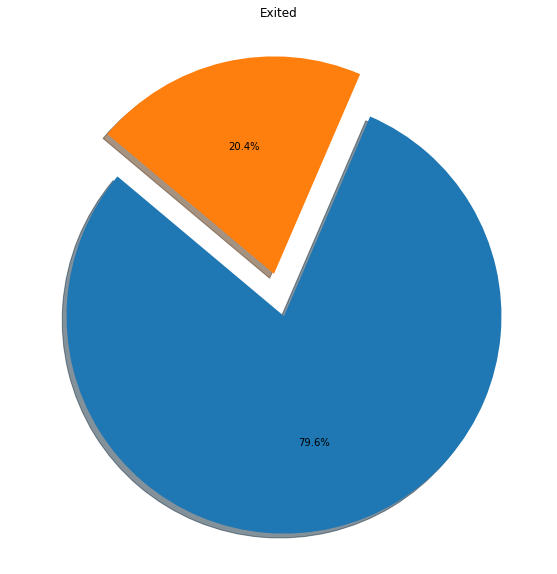

In [19]:
EDA_target(df, target)

The pie chart above represents the two possible prediction oucomes of the machine learning models to be developed. As it can be seen, the dataset consists of an imbalance in terms of its possible outcomes of 'Not Exited' and 'Exited'. 
This is a crucial insight as the the imbalance needs to be corrected in order to prevent overfitting of the machine learning model to be developed.

## IDV

### IDV Objective

+---------+-------------+
|         |   Geography |
|---------+-------------|
| France  |        5014 |
| Germany |        2509 |
| Spain   |        2477 |
+---------+-------------+


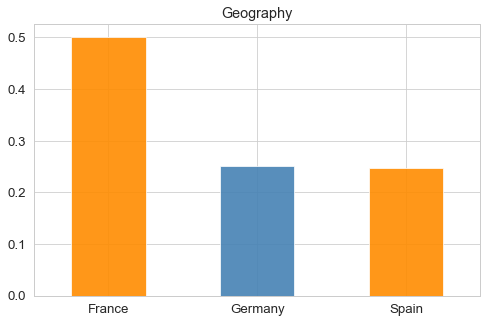

+--------+----------+
|        |   Gender |
|--------+----------|
| Male   |     5457 |
| Female |     4543 |
+--------+----------+


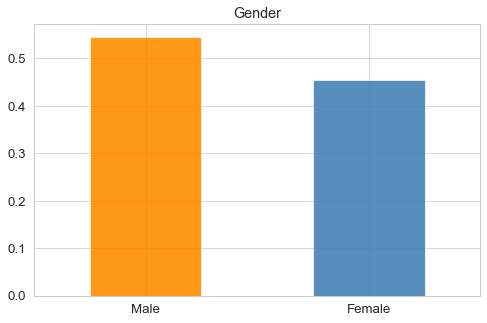

+----+----------+
|    |   Tenure |
|----+----------|
|  2 |     1048 |
|  1 |     1035 |
|  7 |     1028 |
|  8 |     1025 |
|  5 |     1012 |
|  3 |     1009 |
|  4 |      989 |
|  9 |      984 |
|  6 |      967 |
| 10 |      490 |
|  0 |      413 |
+----+----------+


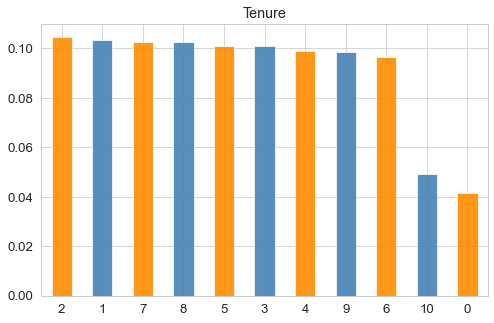

+----+-----------------+
|    |   NumOfProducts |
|----+-----------------|
|  1 |            5084 |
|  2 |            4590 |
|  3 |             266 |
|  4 |              60 |
+----+-----------------+


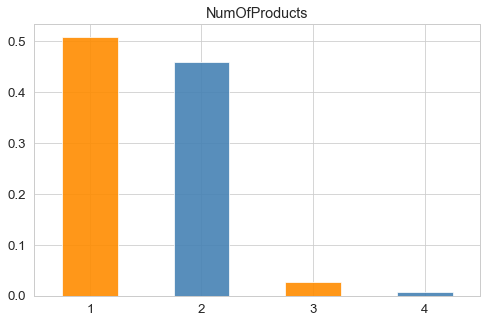

+----+-------------+
|    |   HasCrCard |
|----+-------------|
|  1 |        7055 |
|  0 |        2945 |
+----+-------------+


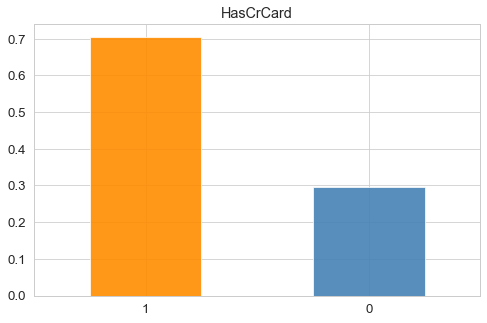

+----+------------------+
|    |   IsActiveMember |
|----+------------------|
|  1 |             5151 |
|  0 |             4849 |
+----+------------------+


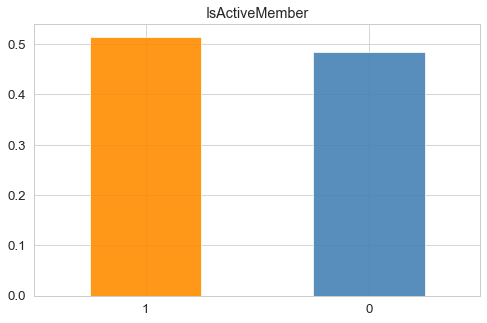

In [24]:
obj_EDA(df, Objcols)

### IDV Objective With DV

In [21]:
EDA_obj(df, Objcols, target)

Variable Name:  Geography


Variable Name:  Gender


Variable Name:  Tenure


Variable Name:  NumOfProducts


Variable Name:  HasCrCard


Variable Name:  IsActiveMember


### IDV Numrical

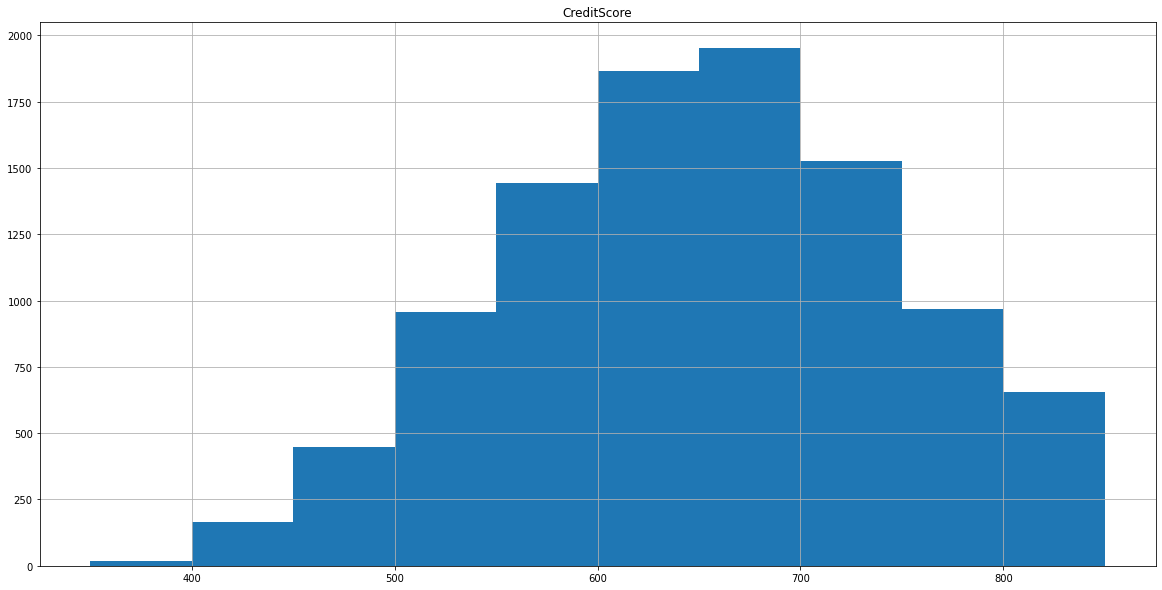

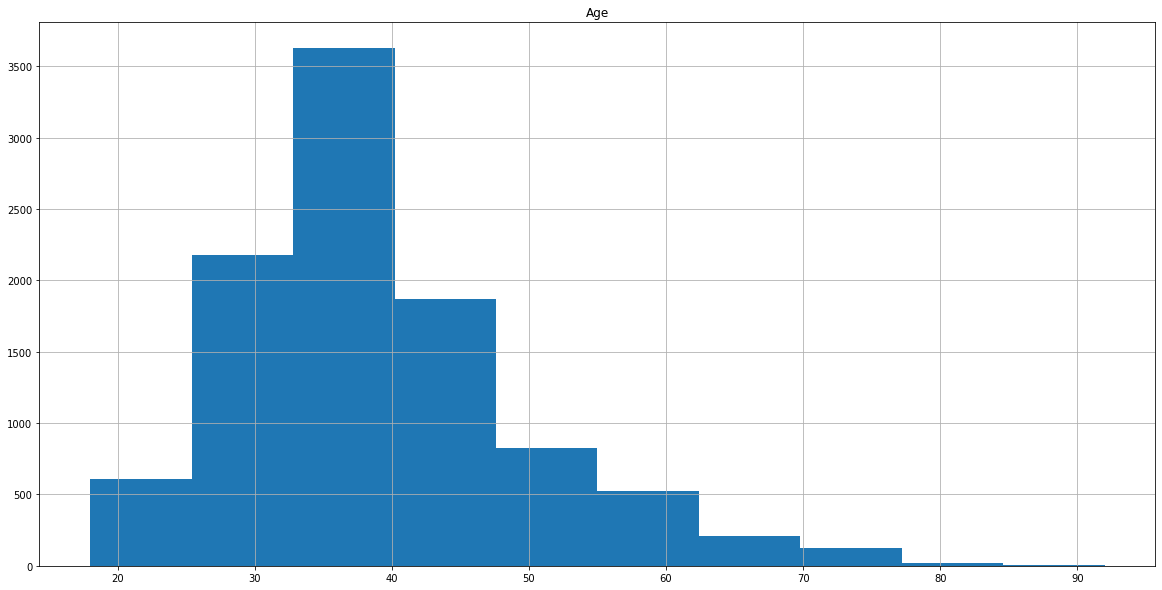

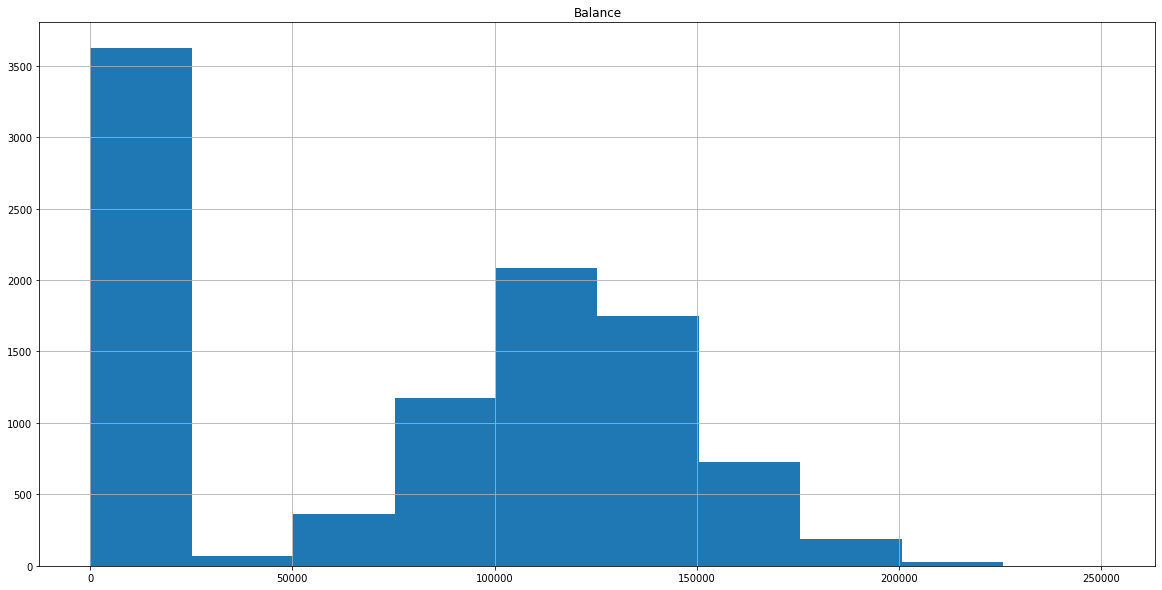

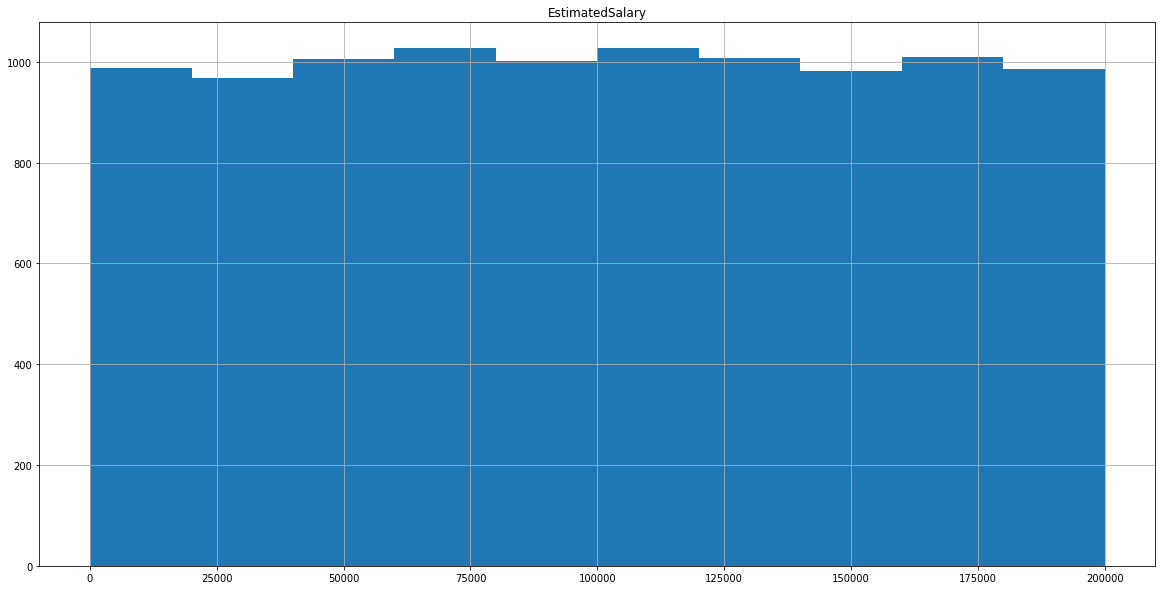

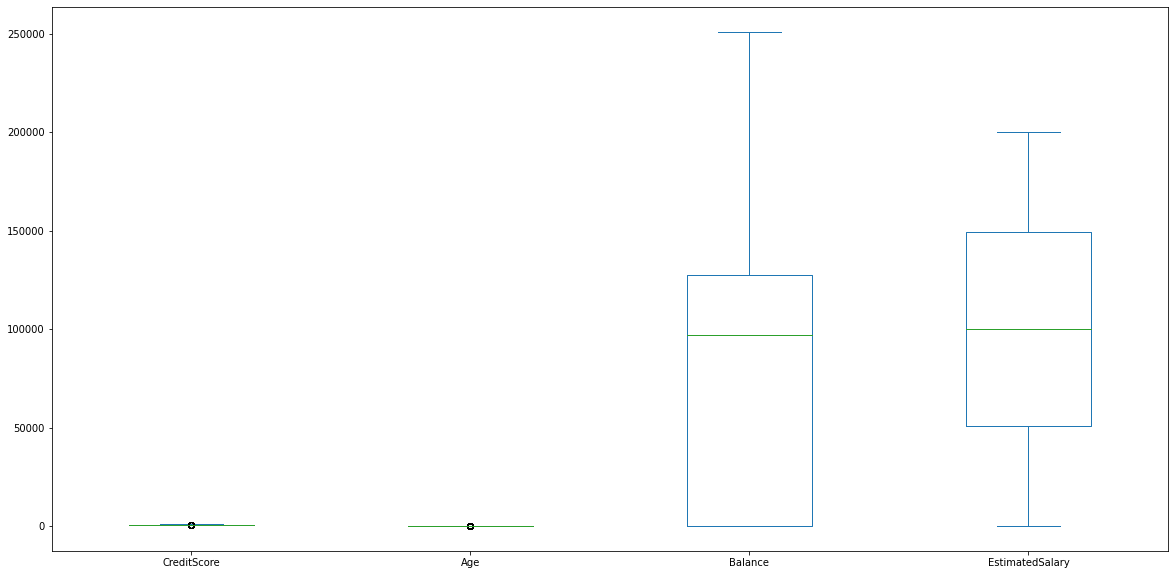

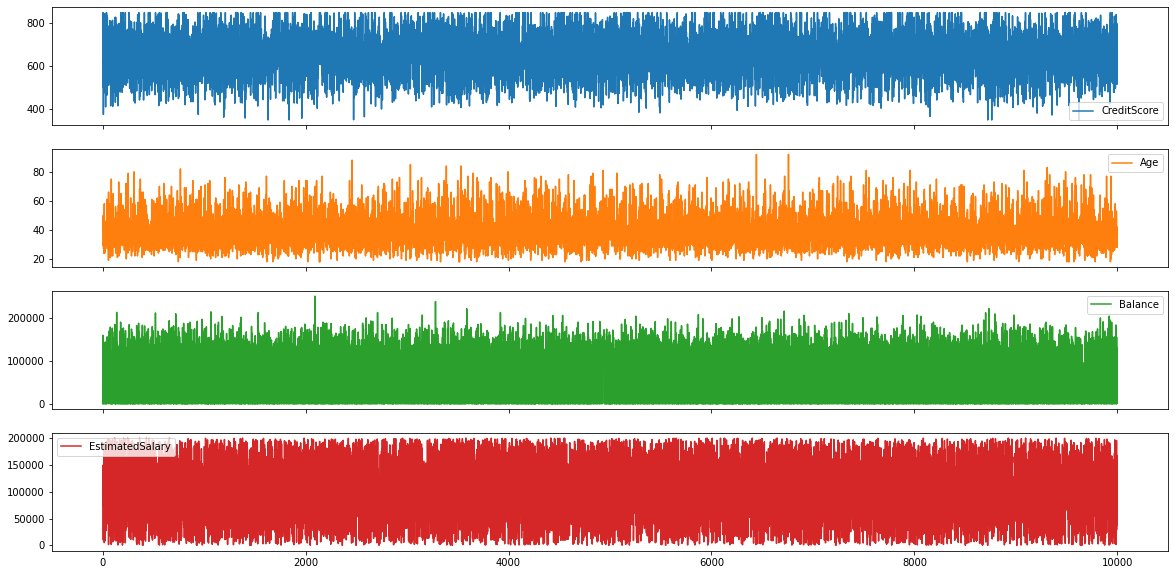

In [22]:
EDA_num(df, NUMcols)

### IDV Objective With DV

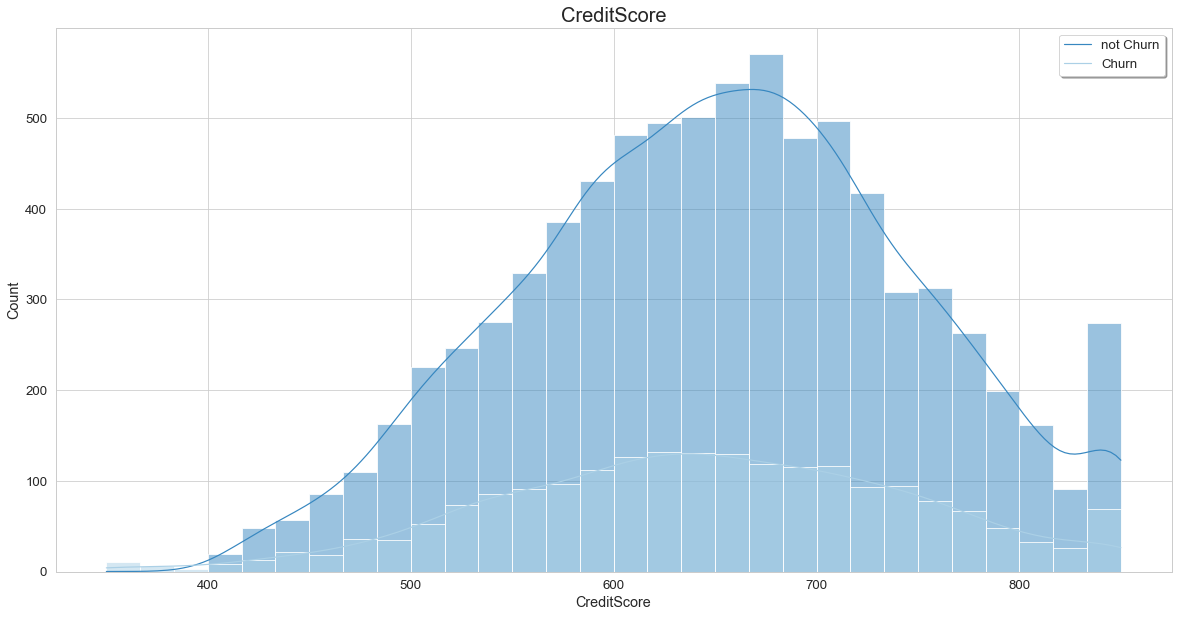

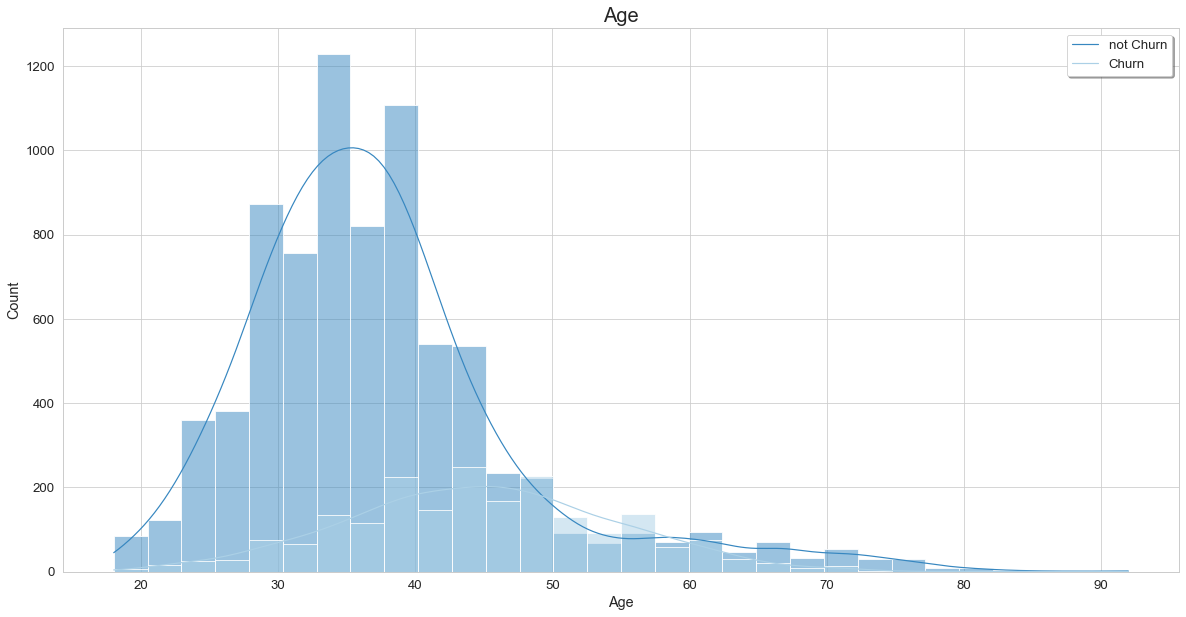

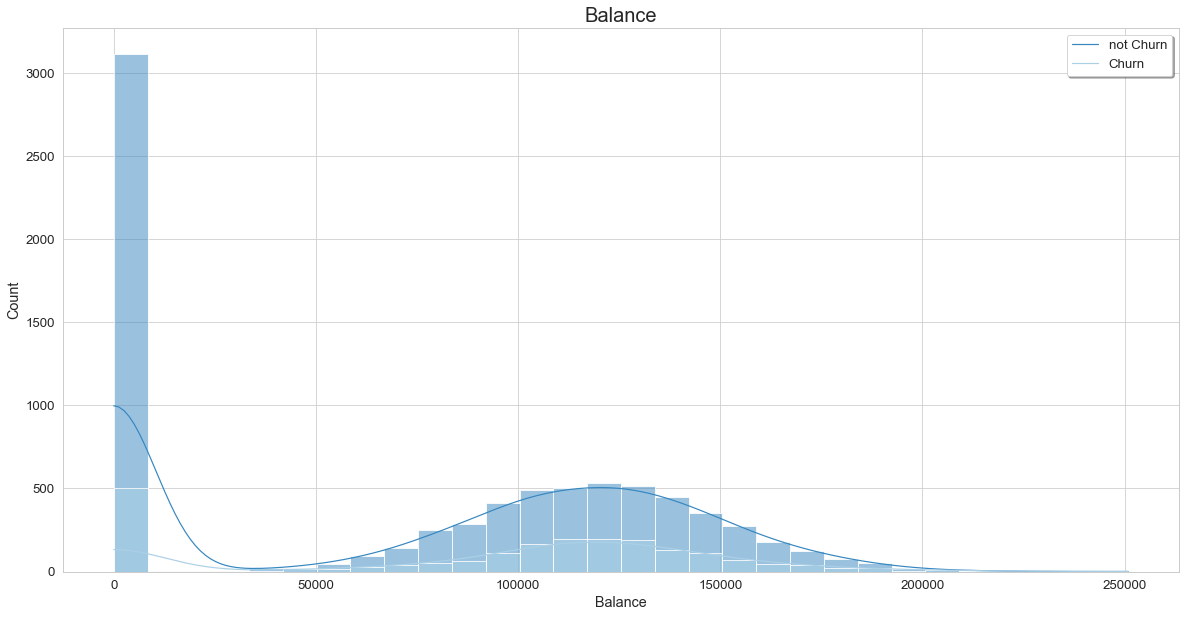

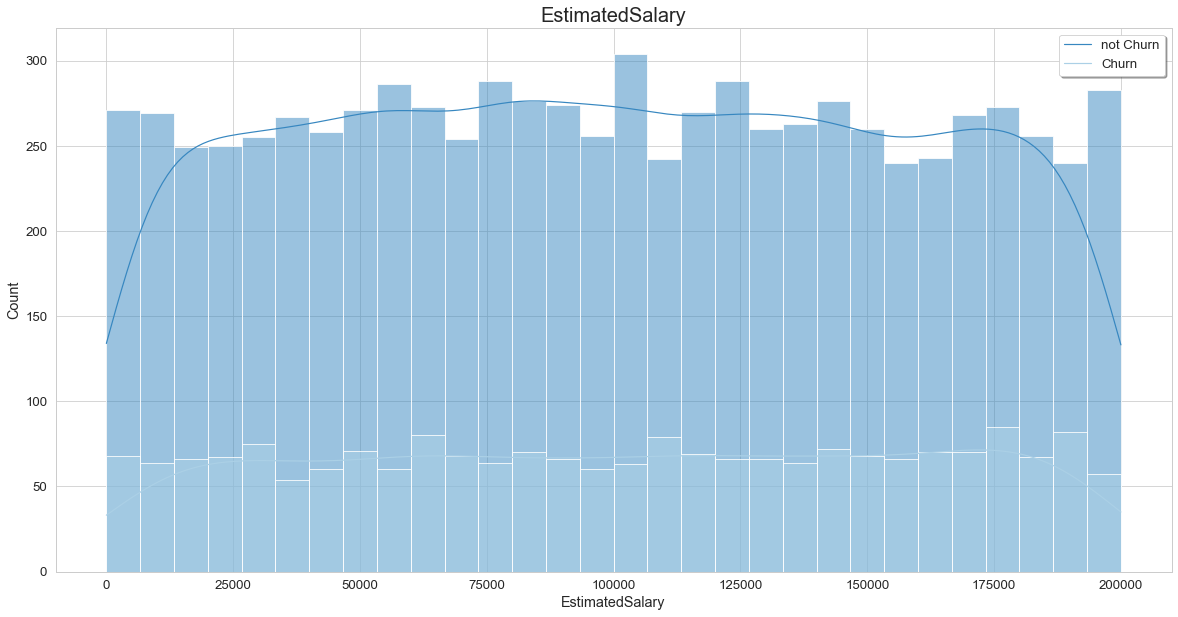

In [23]:
EDA_num_with_DV(df, NUMcols)

# 08. Data Transformation

Machine Learning algorithms perform better when numerical input variables are scaled to a standard range.
Normalization scales. Normalization scales each input variable separately to the range 0-1

In [25]:
# Normalization
df = NumNormalization(df)


Normalization Applied On: CreditScore

Normalization Applied On: Age

Normalization Applied On: Balance

Normalization Applied On: EstimatedSalary


In [26]:
pd.DataFrame(df.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324,2,0.000,1,1,1,0.507,1
1,0.516,Spain,Female,0.311,1,0.334,1,0,1,0.563,0
2,0.304,France,Female,0.324,8,0.636,3,1,0,0.570,1
3,0.698,France,Female,0.284,1,0.000,2,0,0,0.469,0
4,1.000,Spain,Female,0.338,2,0.500,1,1,1,0.395,0


As noted in the table above, Normalization was performed to the variables "Age," "CreditScore", "Balance", and "EstimatedSalary," each variable's value has previously been Normalized.

# 09. Feature Selection

## Wrapper "Forward", "Backward" 

Feature Selection helps in finding the smallest set of features which results in

- Training a machine learning algorithm faster.
- Reducing the complexity of a model and making it easier to interpret.
- Building a sensible model with better prediction power.
- Reducing over-fitting by selecting the right set of features.

In [27]:
df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']

All the obj Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s finished

[2022-06-23 03:55:40] Features: 1/4 -- score: 0.79925[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished

[2022-06-23 03:55:43] Features: 2/4 -- score: 0.758875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s finished

[2022-06-23 03:55:46] Features: 3/4 -- score: 0.773875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Most Variables Can Effect The Target Variables:
 ('Age',)

With Highest Score:
 0.79925
All the Num Variables Selected: ['Age']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished

[2022-06-23 03:55:47] Features: 4/4 -- score: 0.795125

In [28]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.81375, 0.79, 0.81375, 0.791875, 0.786875]",0.799,"(Age,)",0.015,0.012,0.006
2,"(1, 2)","[0.7525, 0.756875, 0.770625, 0.74875, 0.765625]",0.759,"(Age, Balance)",0.010,0.008,0.004
3,"(0, 1, 2)","[0.78625, 0.7775, 0.766875, 0.759375, 0.779375]",0.774,"(CreditScore, Age, Balance)",0.012,0.010,0.005
4,"(0, 1, 2, 3)","[0.793125, 0.79125, 0.800625, 0.793125, 0.7975]",0.795,"(CreditScore, Age, Balance, EstimatedSalary)",0.004,0.003,0.002


As we can see In forward selection, it starts with a null model and then starts fitting the model with each individual numerical feature one at a time and selects the feature with the minimum p-value. then it fits a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again it selects the feature with the minimum p-value. then it fits a model with three features by trying combinations of two previously selected features with other remaining features. It repeats this process until it has a set of selected features with a p-value of individual features less than the significance level.

In [29]:
pd.DataFrame(df.head())

,Age,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0.324,France,Female,2,1,1,1,1
1,0.311,Spain,Female,1,1,0,1,0
2,0.324,France,Female,8,3,1,0,1
3,0.284,France,Female,1,2,0,0,0
4,0.338,Spain,Female,2,1,1,1,0


The 'Age' variable, which has the highest average score and has no other numerical variables, is shown to have the highest average score in the table above that displays the average score for each step in the forward selection.
Therefore, out of all the numerical features, the model will now just choose the 'Age' variable.

# 10. Feature Engineering 

This approach is very simple and it involves converting each value in a column to a number. 
As well as, it requires the category column to be of ‘category’ datatype. 

In [30]:
df = df.apply(lambda x: AllObjLabelEncoder(x))


LableEncoding Applied On: Geography

LableEncoding Applied On: Gender

LableEncoding Applied On: Tenure

LableEncoding Applied On: NumOfProducts

LableEncoding Applied On: HasCrCard

LableEncoding Applied On: IsActiveMember

LableEncoding Applied On: Exited


In [32]:
pd.DataFrame(df.head())

,Age,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0.324,0,0,3,0,1,1,1
1,0.311,2,0,1,0,0,1,0
2,0.324,0,0,9,2,1,0,1
3,0.284,0,0,1,1,0,0,0
4,0.338,2,0,3,0,1,1,0


# 11. Statistics 

## Correlation between IDV and DV

In [33]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,Exited
0,Exited,1.000
1,Age,0.285
2,Geography,0.036
3,HasCrCard,-0.007
4,Tenure,-0.017
5,NumOfProducts,-0.048
6,Gender,-0.107
7,IsActiveMember,-0.156


## Correlation between all the Variables

In [34]:
pd.DataFrame(df.corr())

,Age,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
Age,1.000,0.023,-0.028,-0.015,-0.031,-0.012,0.085,0.285
Geography,0.023,1.000,0.005,0.004,0.004,-0.009,0.007,0.036
Gender,-0.028,0.005,1.000,0.029,-0.022,0.006,0.023,-0.107
Tenure,-0.015,0.004,0.029,1.000,0.010,0.020,-0.028,-0.017
NumOfProducts,-0.031,0.004,-0.022,0.010,1.000,0.003,0.010,-0.048
HasCrCard,-0.012,-0.009,0.006,0.020,0.003,1.000,-0.012,-0.007
IsActiveMember,0.085,0.007,0.023,-0.028,0.010,-0.012,1.000,-0.156
Exited,0.285,0.036,-0.107,-0.017,-0.048,-0.007,-0.156,1.000


In [35]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,Age,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
Age,1.000000,0.022812,-0.027544,-0.014882,-0.030680,-0.011721,0.085472,0.285323
Geography,0.022812,1.000000,0.004719,0.004367,0.003972,-0.008523,0.006724,0.035943
Gender,-0.027544,0.004719,1.000000,0.029345,-0.021859,0.005766,0.022544,-0.106512
Tenure,-0.014882,0.004367,0.029345,1.000000,0.010100,0.019511,-0.028142,-0.017051
NumOfProducts,-0.030680,0.003972,-0.021859,0.010100,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.011721,-0.008523,0.005766,0.019511,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.085472,0.006724,0.022544,-0.028142,0.009612,-0.011866,1.000000,-0.156128
Exited,0.285323,0.035943,-0.106512,-0.017051,-0.047820,-0.007138,-0.156128,1.000000


# 12. Resampling Data

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance the minority class. In this section will develop an intuition for the SMOTE approaches by applying it to an imbalanced binary classification problem.
- Note the model will evaluate using the ROC area under curve (AUC) metric

In [36]:
# Define X, y
X = df.drop(target, axis=1)
y = df[target]

X, y = resampling_by_smoth(X, y)


Original dataset shape Counter({0: 7963, 1: 2037})
SMOTH Resample dataset shape Counter({1: 7963, 0: 7963})
SMOTH Mean ROC AUC:  0.8515673779490253

Original dataset shape Counter({0: 7963, 1: 2037})
SMOTH SVM Resample dataset shape Counter({1: 7963, 0: 7963})
SMOTH SVM Mean ROC AUC:  0.8507524680314112

Original dataset shape Counter({0: 7963, 1: 2037})
Standerd SMOTH pipeline Resample dataset shape Counter({0: 7963, 1: 7963})
Standerd SMOTH pipeline Mean ROC AUC:  0.8492219386894309

Original dataset shape Counter({0: 7963, 1: 2037})
K neighbors SMOTH pipeline Resample dataset shape Counter({0: 7963, 1: 7963})
K neighbors SMOTH pipeline Mean ROC AUC:  0.8485137486243874

	The Highest ROC Score is:  0.8515673779490253


As it provides, the K neighbors SMOTE pipeline is showing the highest ROC, so it the SMOTE approach select is K neighbors SMOTE pipeline.

In [37]:
print('\nOriginal dataset shape', Counter(y))


Original dataset shape Counter({1: 7963, 0: 7963})


# 13. Data Splitting 

Based on the dataset size, it will split the dataset into 80% for traning and 20% for testing 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(12740, 7)
(12740,)
(3186, 7)
(3186,)


# 14. Machine Learning Models 

* In this sectuion going to fit 'Train' 16 machine learning models:
    -        Random Forest Classifier
    -        Gradient Boosting Classifier
    -        Histogram-based Gradient Boosting Classification Tree
    -        AdaBoost Classifier
    -        Extra Trees Classifier
    -        K Neighbors Classifier
    -        Naive Bayes Classifiers
    -        Naive Bayes Classifier for Multivariate Bernoulli
    -        Decision Tree Classifier
    -        Logistic Regression Classifier
    -        Logistic Regression CV Classifier
    -        Stochastic Gradient Descent Classifier
    -        Linear Perceptron Classifier
    -        XGBoost Classifiers
    -        Support Vector Machines Classifiers
    -        Linear Support Vector Classification
    -        Multilayer Perceptron Classifier
* Following that it going to test the models.

* After that it going to evaluate each model using: 
    -   Accuracy Score
    -   Classification Report
    -   Confusion Matrix

## Build the Models using CPU

In [39]:
# Random Forest Classifier
rf_m_1_cpu = RandomForestClassifier().fit(X_train, y_train)

# Gradient Boosting Classifier
gb_m_1_cpu = GradientBoostingClassifier().fit(X_train, y_train)

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_cpu = HistGradientBoostingClassifier().fit(X_train, y_train)

# AdaBoost Classifier
ad_m_1_cpu = AdaBoostClassifier().fit(X_train, y_train)

# Extra Trees Classifier
et_m_1_cpu = ExtraTreesClassifier().fit(X_train, y_train)

# K Neighbors Classifier
knn_m_1_cpu = KNeighborsClassifier().fit(X_train, y_train)

# Naive Bayes Classifiers
nb_m_1_cpu = GaussianNB().fit(X_train, y_train)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_cpu = BernoulliNB().fit(X_train, y_train)

# Decision Tree Classifier
dt_m_1_cpu = DecisionTreeClassifier().fit(X_train, y_train)

# Logistic Regression Classifier
lg_m_1_cpu = LogisticRegression().fit(X_train, y_train)

    # Logistic Regression CV Classifier
lgcv_m_1_cpu = LogisticRegressionCV().fit(X_train, y_train)

# Stochastic Gradient Descent Classifier
sgdc_m_1_cpu = SGDClassifier().fit(X_train, y_train)

# Linear Perceptron Classifier
lpc_m_1_cpu = Perceptron().fit(X_train, y_train)

# XGBoost Classifiers
xgb_m_1_cpu = XGBClassifier().fit(X_train, y_train)

# Support Vector Machines Classifiers
svm_m_1_cpu = SVC().fit(X_train, y_train)

# Linear Support Vector Classification
lsvm_m_1_cpu = LinearSVC().fit(X_train, y_train)

# Multilayer Perceptron Classifier
mlp_m_1_cpu = MLPClassifier().fit(X_train, y_train)

## Predict y_test Using CPU

In [40]:
# Random Forest Classifier
rf_m_1_pred_vaild_cpu = rf_m_1_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_m_1_pred_vaild_cpu = gb_m_1_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_pred_vaild_cpu = hgb_m_1_cpu.predict(X_test)

# AdaBoost Classifier
ad_m_1_pred_vaild_cpu = ad_m_1_cpu.predict(X_test)

# Extra Trees Classifier
et_m_1_pred_vaild_cpu = et_m_1_cpu.predict(X_test)

# K Neighbors Classifier
knn_m_1_pred_vaild_cpu = knn_m_1_cpu.predict(X_test)

# Naive Bayes Classifiers
nb_m_1_pred_vaild_cpu = nb_m_1_cpu.predict(X_test)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_pred_vaild_cpu = bnb_m_1_cpu.predict(X_test)

# Decision Tree Classifier
dt_m_1_pred_vaild_cpu = dt_m_1_cpu.predict(X_test)

# Logistic Regression Classifier
lg_m_1_pred_vaild_cpu = lg_m_1_cpu.predict(X_test)

# Logistic Regression CV Classifier
lgcv_m_1_pred_vaild_cpu =  lgcv_m_1_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_m_1_pred_vaild_cpu =  sgdc_m_1_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_m_1_pred_vaild_cpu =  lpc_m_1_cpu.predict(X_test)

# XGBoost Classifiers
xgb_m_1_pred_vaild_cpu = xgb_m_1_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_m_1_pred_vaild_cpu = svm_m_1_cpu.predict(X_test)

# Linear Support Vector Classification
lsvm_m_1_pred_vaild_cpu = lsvm_m_1_cpu.predict(X_test)

# Multilayer Perceptron Classifier
mlp_m_1_pred_vaild_cpu = mlp_m_1_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [41]:
# Random Forest Classifier
Valid_accuracy_rf_m_1_cpu = accuracy_score(y_test, rf_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_m_1_cpu = accuracy_score(y_test, gb_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_m_1_cpu = accuracy_score(y_test, hgb_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_m_1_cpu = accuracy_score(y_test, ad_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_m_1_cpu = accuracy_score(y_test, et_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_m_1_cpu = accuracy_score(y_test, knn_m_1_pred_vaild_cpu)

# Naive Bayes Classifiers
Valid_accuracy_nb_m_1_cpu = accuracy_score(y_test, nb_m_1_pred_vaild_cpu)

# Naive Bayes Classifier for Multivariate Bernoulli
Valid_accuracy_bnb_m_1_cpu = accuracy_score(y_test, bnb_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_m_1_cpu = accuracy_score(y_test, dt_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_m_1_cpu = accuracy_score(y_test, lg_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_m_1_cpu = accuracy_score(y_test, lgcv_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_m_1_cpu = accuracy_score(y_test, sgdc_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_m_1_cpu = accuracy_score(y_test, lpc_m_1_pred_vaild_cpu)

# XGBoost Classifiers
Valid_accuracy_xgb_m_1_cpu = accuracy_score(y_test, xgb_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_m_1_cpu = accuracy_score(y_test, svm_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_m_1_cpu = accuracy_score(y_test, lsvm_m_1_pred_vaild_cpu)

# Multilayer Perceptron Classifier
Valid_accuracy_mlp_m_1_cpu = accuracy_score(y_test, mlp_m_1_pred_vaild_cpu)

cpu_ml_m_1_valid_compare = pd.DataFrame({"Standered CPU Models": [
                                        "Random Forest Classifier", 
                                        "Gradient Boosting Classifier",
                                        "Histogram-based Gradient Boosting Classification Tree",
                                        "AdaBoost Classifier",
                                        "Extra Trees Classifier",
                                        "K Neighbors Classifier",
                                        "Naive Bayes Classifiers",
                                        "Naive Bayes Classifier for Multivariate Bernoulli",
                                        "Decision Tree Classifier",
                                        "Logistic Regression Classifier",
                                        "Logistic Regression CV Classifier",
                                        "Stochastic Gradient Descent Classifier",
                                        "Linear Perceptron Classifier",
                                        "XGBoost Classifiers",
                                        "Support Vector Machines Classifiers",
                                        "Linear Support Vector Classification",
                                        "Multilayer Perceptron Classifier"
                                        ],

                        "Accuracy Standered CPU Models": [
                                        Valid_accuracy_rf_m_1_cpu, 
                                        Valid_accuracy_gb_m_1_cpu,
                                        Valid_accuracy_hgb_m_1_cpu,
                                        Valid_accuracy_ad_m_1_cpu,
                                        Valid_accuracy_et_m_1_cpu,
                                        Valid_accuracy_knn_m_1_cpu,
                                        Valid_accuracy_nb_m_1_cpu,
                                        Valid_accuracy_bnb_m_1_cpu,
                                        Valid_accuracy_dt_m_1_cpu,
                                        Valid_accuracy_lg_m_1_cpu,
                                        Valid_accuracy_lgcv_m_1_cpu,
                                        Valid_accuracy_sgdc_m_1_cpu,
                                        Valid_accuracy_lpc_m_1_cpu,
                                        Valid_accuracy_xgb_m_1_cpu,
                                        Valid_accuracy_svm_m_1_cpu,
                                        Valid_accuracy_lsvm_m_1_cpu,
                                        Valid_accuracy_mlp_m_1_cpu
                                        ],
                                })  
                                        
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Accuracy Standered CPU Models", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Accuracy Standered CPU Models", ascending=True), x = "Accuracy Standered CPU Models", y = "Standered CPU Models", title = "CPU Model Machines Learning Accuracy Validation")
fig.show()

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Accuracy Standered CPU Models |
|----+-------------------------------------------------------+---------------------------------|
| 13 | XGBoost Classifiers                                   |                        0.895794 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                        0.867859 |
|  8 | Decision Tree Classifier                              |                        0.850282 |
|  1 | Gradient Boosting Classifier                          |                        0.837414 |
|  0 | Random Forest Classifier                              |                        0.826742 |
|  4 | Extra Trees Classifier                                |                        0.815129 |
|  3 | AdaBoost Classifier                                   |                        0.811048 |
|  5 | K Neighbors Classifier 

### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.826     0.838     0.832      1633
           1      0.827     0.815     0.821      1553

    accuracy                          0.827      3186
   macro avg      0.827     0.826     0.827      3186
weighted avg      0.827     0.827     0.827      3186



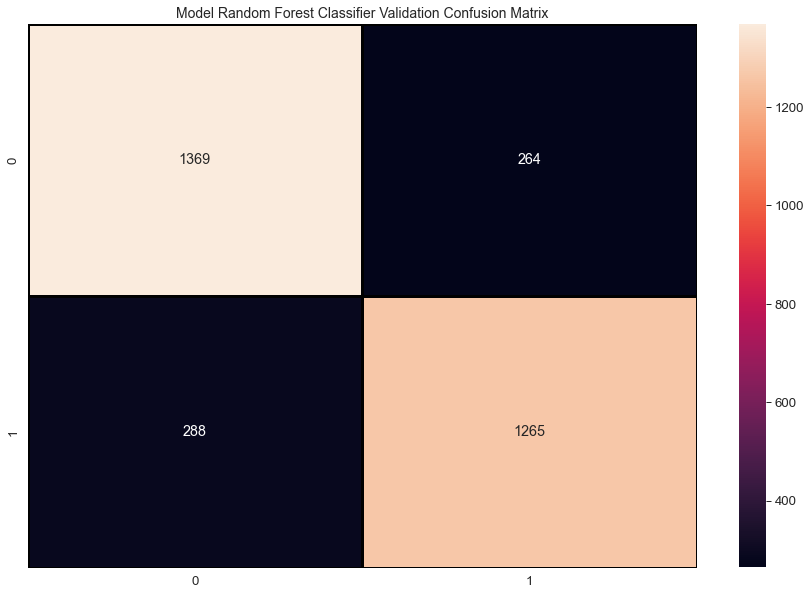

In [42]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.842     0.841     0.841      1633
           1      0.833     0.834     0.833      1553

    accuracy                          0.837      3186
   macro avg      0.837     0.837     0.837      3186
weighted avg      0.837     0.837     0.837      3186



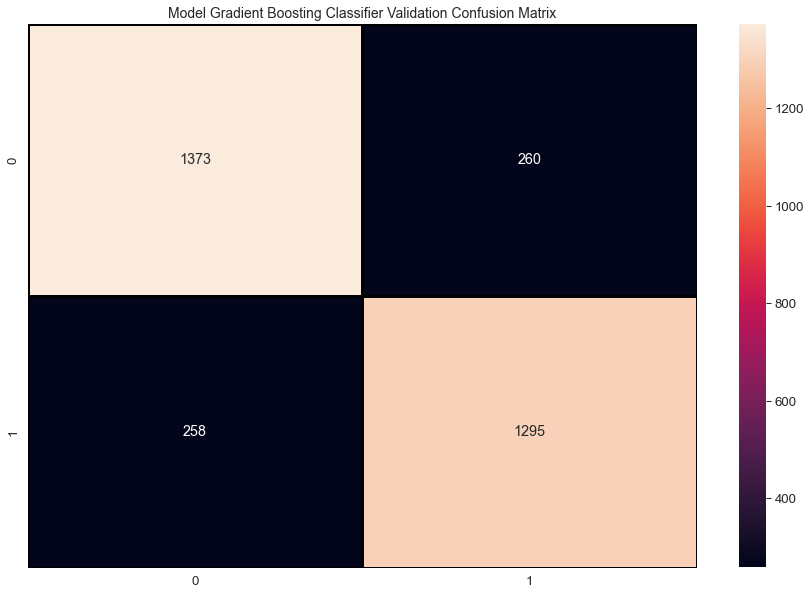

In [43]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.857     0.890     0.874      1633
           1      0.880     0.844     0.862      1553

    accuracy                          0.868      3186
   macro avg      0.869     0.867     0.868      3186
weighted avg      0.868     0.868     0.868      3186



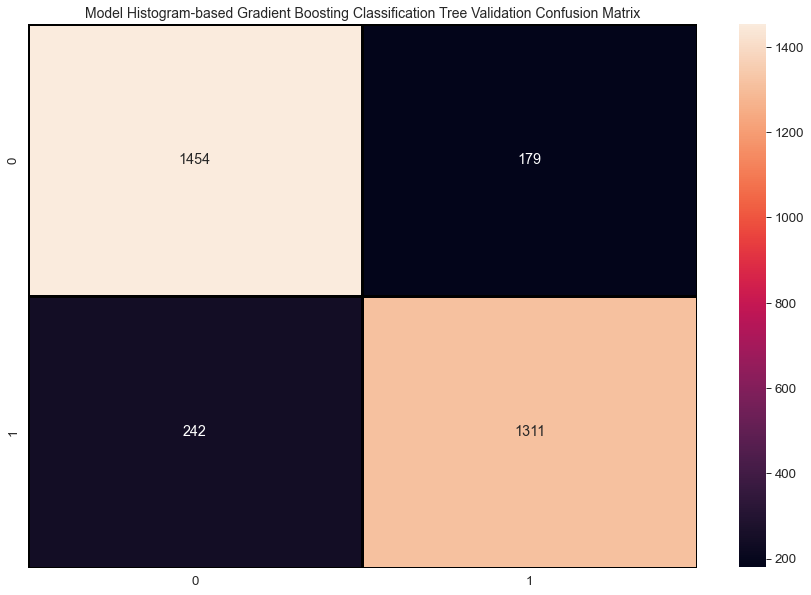

In [44]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.813     0.820     0.816      1633
           1      0.809     0.802     0.805      1553

    accuracy                          0.811      3186
   macro avg      0.811     0.811     0.811      3186
weighted avg      0.811     0.811     0.811      3186



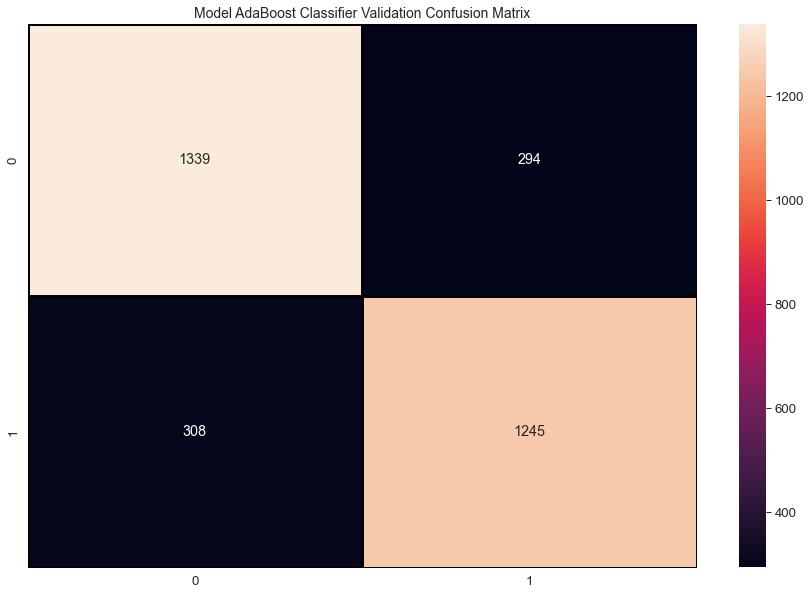

In [45]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.812     0.832     0.822      1633
           1      0.819     0.797     0.808      1553

    accuracy                          0.815      3186
   macro avg      0.815     0.815     0.815      3186
weighted avg      0.815     0.815     0.815      3186



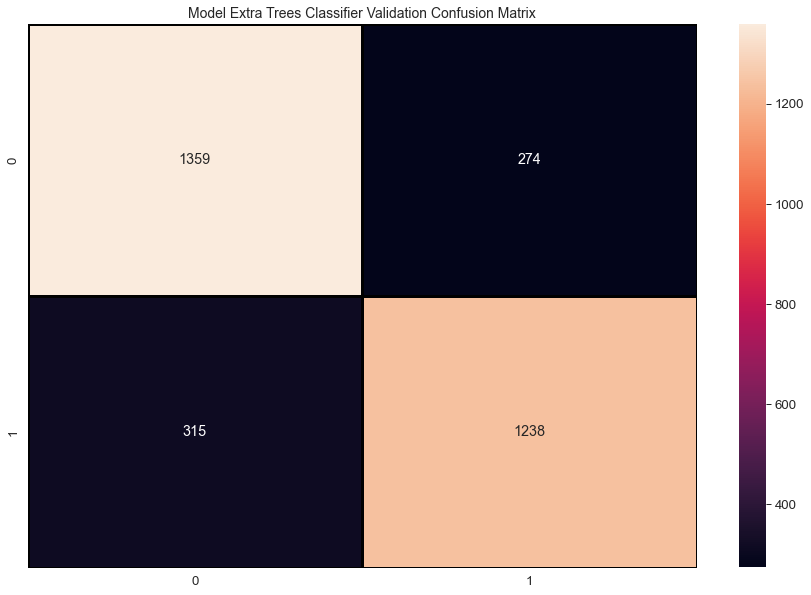

In [46]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.839     0.774     0.805      1633
           1      0.780     0.844     0.811      1553

    accuracy                          0.808      3186
   macro avg      0.809     0.809     0.808      3186
weighted avg      0.810     0.808     0.808      3186



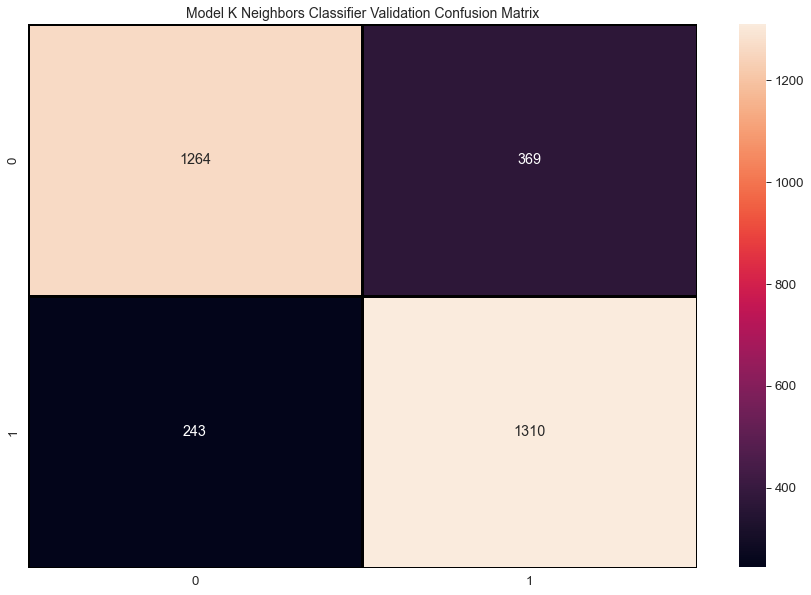

In [47]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier 

Model Naive Bayes Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.766     0.740     0.753      1633
           1      0.736     0.762     0.749      1553

    accuracy                          0.751      3186
   macro avg      0.751     0.751     0.751      3186
weighted avg      0.751     0.751     0.751      3186



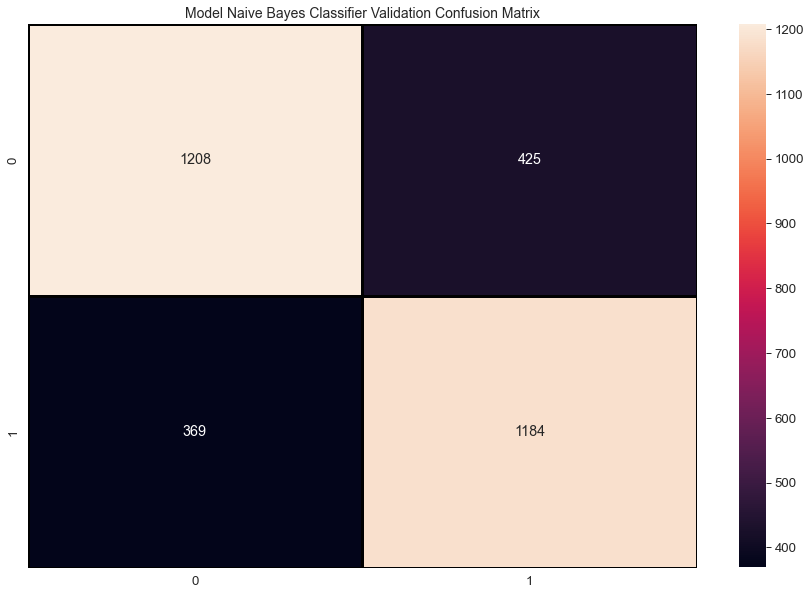

In [48]:
print('Model Naive Bayes Classifier Validation Classification Report:\n ', classification_report(y_test, nb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, nb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Naive Bayes Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier for Multivariate Bernoulli

Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:
                precision    recall  f1-score   support

           0      0.686     0.677     0.681      1633
           1      0.665     0.674     0.669      1553

    accuracy                          0.675      3186
   macro avg      0.675     0.675     0.675      3186
weighted avg      0.676     0.675     0.675      3186



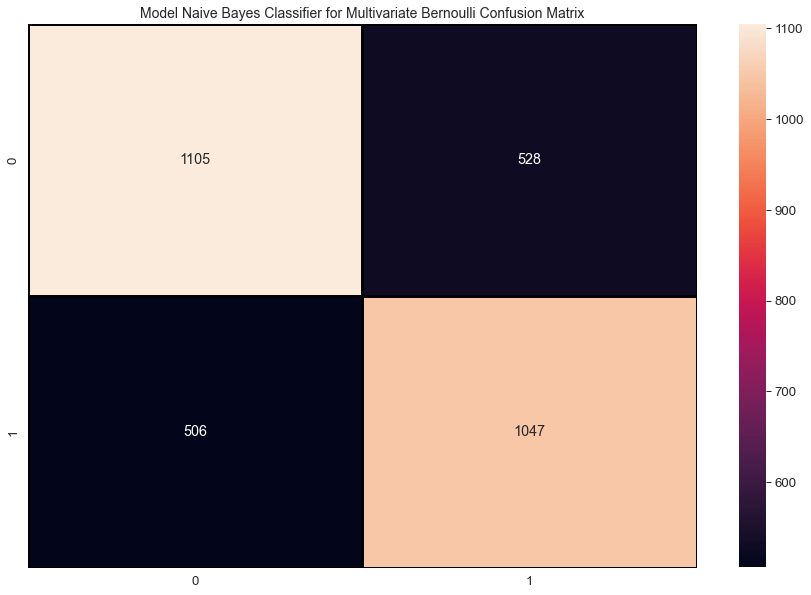

In [49]:
print('Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:\n ', classification_report(y_test, bnb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, bnb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Naive Bayes Classifier for Multivariate Bernoulli Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.846     0.866     0.856      1633
           1      0.855     0.834     0.844      1553

    accuracy                          0.850      3186
   macro avg      0.851     0.850     0.850      3186
weighted avg      0.850     0.850     0.850      3186



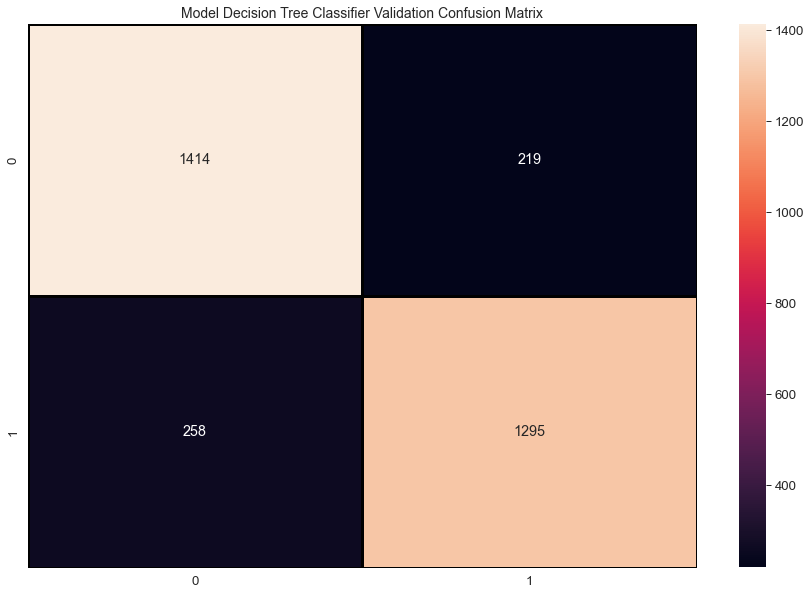

In [50]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.711     0.705     0.708      1633
           1      0.693     0.699     0.696      1553

    accuracy                          0.702      3186
   macro avg      0.702     0.702     0.702      3186
weighted avg      0.702     0.702     0.702      3186



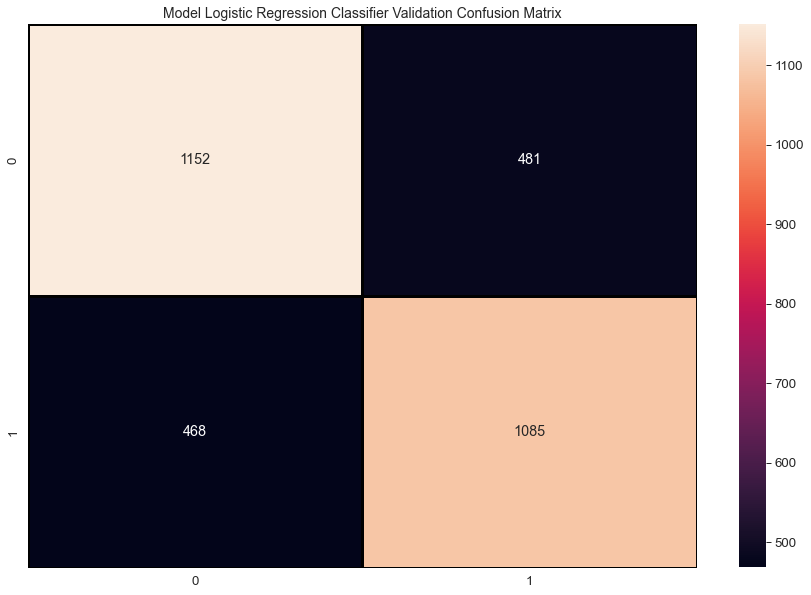

In [51]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.712     0.706     0.709      1633
           1      0.694     0.700     0.697      1553

    accuracy                          0.703      3186
   macro avg      0.703     0.703     0.703      3186
weighted avg      0.703     0.703     0.703      3186



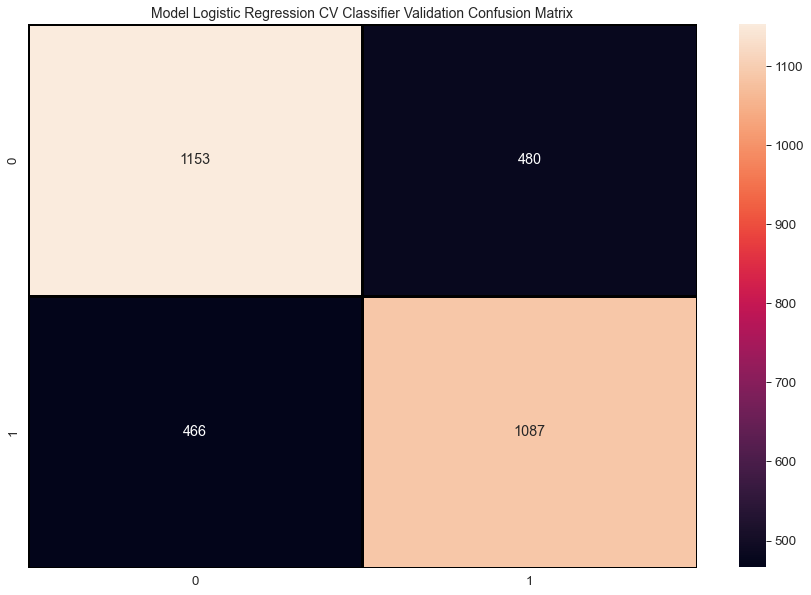

In [52]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.771     0.595     0.672      1633
           1      0.657     0.815     0.727      1553

    accuracy                          0.702      3186
   macro avg      0.714     0.705     0.700      3186
weighted avg      0.716     0.702     0.699      3186



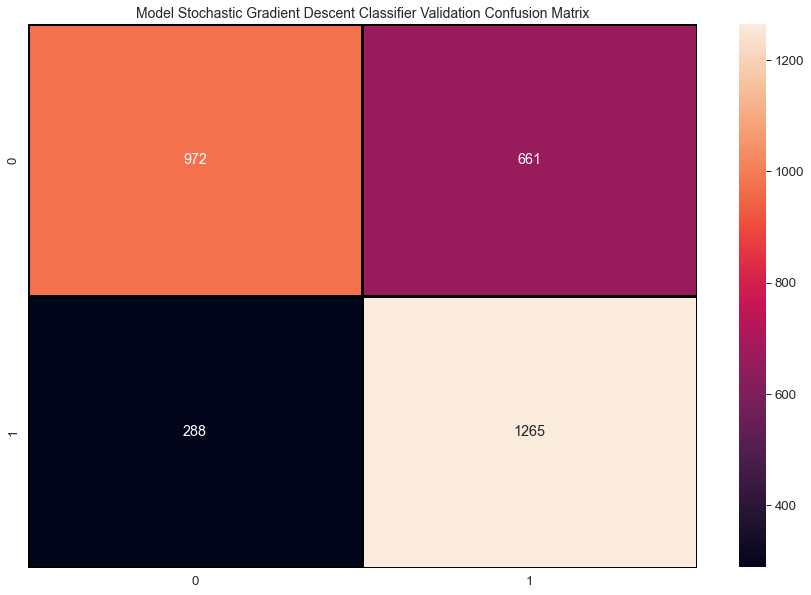

In [53]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.657     0.785     0.715      1633
           1      0.716     0.569     0.634      1553

    accuracy                          0.680      3186
   macro avg      0.686     0.677     0.675      3186
weighted avg      0.686     0.680     0.676      3186



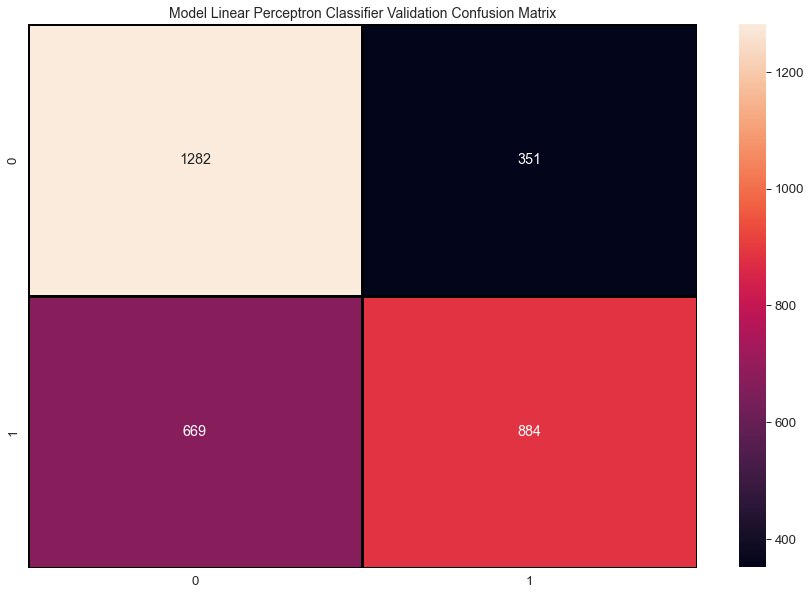

In [54]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### XGBoost Classifier

Model XGBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.877     0.927     0.901      1633
           1      0.918     0.863     0.890      1553

    accuracy                          0.896      3186
   macro avg      0.898     0.895     0.895      3186
weighted avg      0.897     0.896     0.896      3186



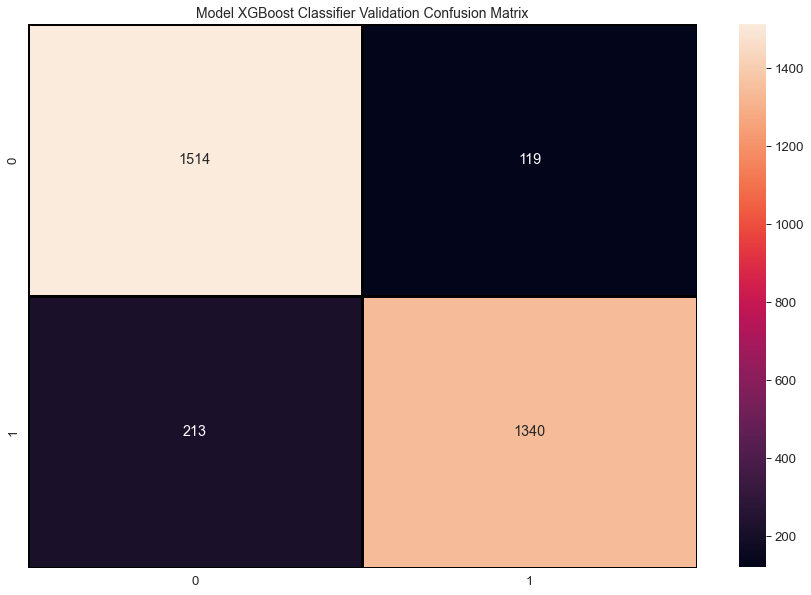

In [55]:
print('Model XGBoost Classifier Validation Classification Report:\n ', classification_report(y_test, xgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, xgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model XGBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.794     0.748     0.770      1633
           1      0.750     0.795     0.772      1553

    accuracy                          0.771      3186
   macro avg      0.772     0.772     0.771      3186
weighted avg      0.772     0.771     0.771      3186



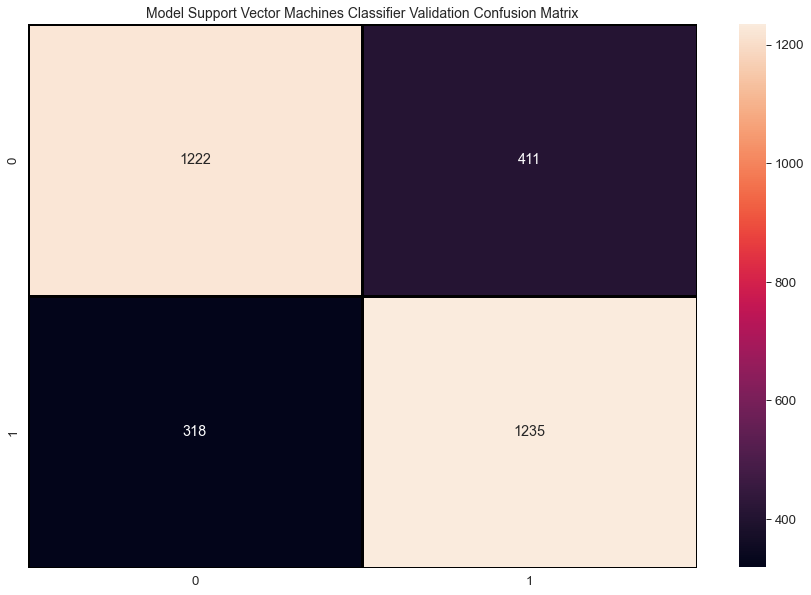

In [56]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.712     0.710     0.711      1633
           1      0.696     0.698     0.697      1553

    accuracy                          0.704      3186
   macro avg      0.704     0.704     0.704      3186
weighted avg      0.704     0.704     0.704      3186



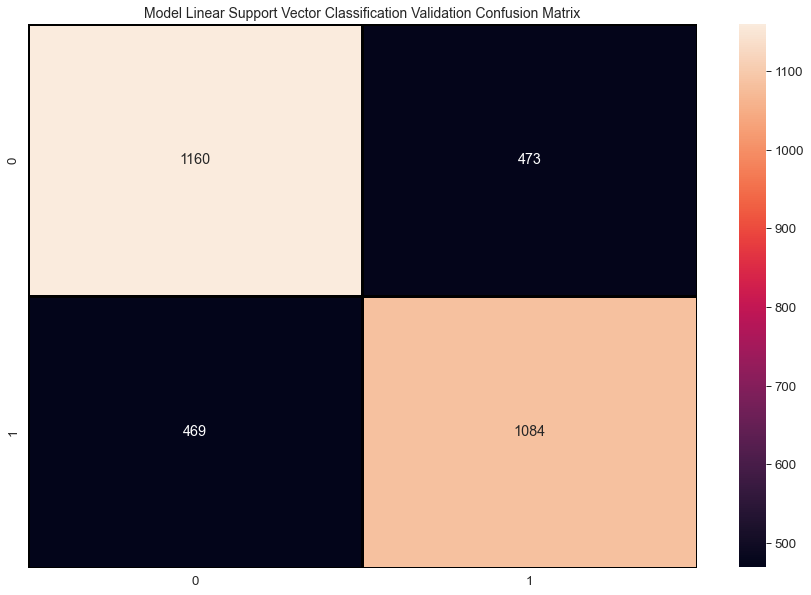

In [57]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

#### Multilayer Perceptron Classifier

Model Multilayer Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.817     0.798     0.808      1633
           1      0.793     0.813     0.803      1553

    accuracy                          0.805      3186
   macro avg      0.805     0.805     0.805      3186
weighted avg      0.805     0.805     0.805      3186



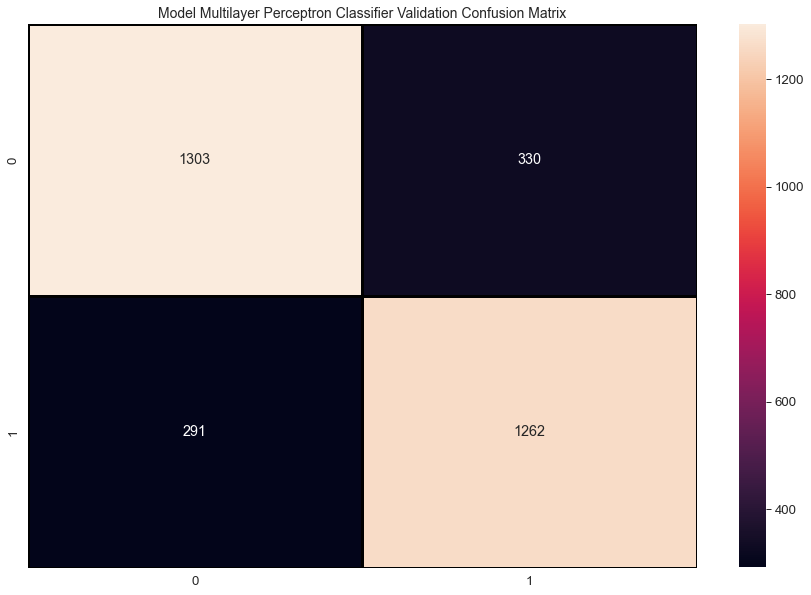

In [58]:
print('Model Multilayer Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, mlp_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, mlp_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Multilayer Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

# 15. Machine Learning Models Optimization

- random grid for CPU Machine Learning Models
- Hyperparameters for CPU Machine Learning Models
- Build the Models 'Train the Models'
-        Random Forest Classifier
-        Gradient Boosting Classifier
-        Histogram-based Gradient Boosting Classification Tree
-        AdaBoost Classifier
-        Extra Trees Classifier
-        K Neighbors Classifier
-        Decision Tree Classifier
-        Logistic Regression Classifier
-        Logistic Regression CV Classifier
-        Stochastic Gradient Descent Classifier
-        Linear Perceptron Classifier
-        XGBoost Classifiers
-        Support Vector Machines Classifiers
-        Linear Support Vector Classification
- Predication X_test
- Models Evaluation
-       Accuracy Score
-       Classification Report
-       Confusion Matrix

##  random grid for CPU Models

### Random Forest Classifier

In [59]:
# Features which make predictions of the model better
n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)]
max_features = ['sqrt', 'log2', 'auto']
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)
min_impurity_decrease = [0.0, 0.2, 0.5, 0.75]

# Features which will make the model training easier
bootstrap = [True, False]
oob_score = [False, True]
n_jobs = [-1]
random_state = [None]
verbose = [0]
warm_start = [False]
class_weight = [None, 'balanced', 'balanced_subsample']
ccp_alpha = [0.0]
max_samples = [None]

# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
            'criterion': criterion,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features,
            'max_leaf_nodes' : max_leaf_nodes, 
            'min_impurity_decrease' : min_impurity_decrease,
            'bootstrap' : bootstrap,
            'oob_score' : oob_score,
            'n_jobs' : n_jobs, 
            'random_state' : random_state,
            'verbose' : verbose,
            'warm_start' : warm_start, 
            'class_weight' : class_weight,
            'ccp_alpha' : ccp_alpha,
            'max_samples' : max_samples
            }  

### Gradient Boosting Classifier

In [60]:
loss = ['log_loss', 'deviance', 'exponential']
learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75]
n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)]
subsample = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0]
criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse']
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5, 0.75]
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75]

init = [None]
random_state = [None]
max_features = ['sqrt', 'log2', 'auto']
verbose = [0]
max_leaf_nodes = [None]
warm_start = [False]
validation_fraction = [0.1]
n_iter_no_change = [None]
tol = [0.0001]
ccp_alpha = [0.0]

# Create the random grid
random_grid_gb = {'loss': loss,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators,
            'subsample': subsample,
            'criterion': criterion,
            'min_samples_split': min_samples_split,
            'min_samples_leaf' : min_samples_leaf, 
            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
            'max_depth' : max_depth,
            'min_impurity_decrease' : min_impurity_decrease,
            'init' : init, 
            'random_state' : random_state,
            'max_features' : max_features,
            'verbose' : verbose, 
            'max_leaf_nodes' : max_leaf_nodes,
            'warm_start' : warm_start,
            'validation_fraction' : validation_fraction,
            'n_iter_no_change' : n_iter_no_change, 
            'tol' : tol,
            'ccp_alpha' : ccp_alpha
            }

### Histogram-based Gradient Boosting Classification Tree

In [61]:
loss= ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy']
learning_rate=[0.1] 
max_iter= [int(x) for x in np.linspace(50, 100, num = 10)] 
max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)]
l2_regularization=[0.0, 0.1, 0.6]
max_bins=[int(x) for x in np.linspace(100, 255, num = 20)]

categorical_features=[None] 
monotonic_cst=[None] 
warm_start=[False]
early_stopping=['auto']
scoring=['loss'] 
validation_fraction=[0.1]
n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)]
tol=[1e-07] 
verbose=[0]
random_state=[None]

random_grid_hgb = {'loss' : loss,
                'learning_rate' : learning_rate,
                'max_iter' : max_iter,
                'max_leaf_nodes' : max_leaf_nodes,
                'max_depth' : max_depth,
                'min_samples_leaf' : min_samples_leaf,
                'l2_regularization' : l2_regularization,
                'max_bins' : max_bins,
                'categorical_features' : categorical_features,
                'monotonic_cst' : monotonic_cst,
                'warm_start' : warm_start,
                'early_stopping' : early_stopping,
                'scoring' : scoring,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'tol' : tol,
                'verbose' : verbose,
                'random_state' : random_state
                    }

### AdaBoost Classifier

In [62]:
base_estimator=[DecisionTreeClassifier(max_depth=1)] 
n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] 
learning_rate=[1.0] 
algorithm=['SAMME','SAMME.R'] 
random_state=[None] 

random_grid_ad = {'base_estimator' : base_estimator,
                'n_estimators' : n_estimators,
                'learning_rate' : learning_rate,
                'algorithm' : algorithm,
                'random_state' : random_state
}

### Extra Trees Classifier

In [63]:
n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0]
max_features = ['sqrt', 'log2', None]
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
#max_leaf_nodes.append(None)

min_impurity_decrease=[0.0]
bootstrap=[False] 
oob_score=[True,False] 
n_jobs=[None] 
random_state=[None] 
verbose=[0] 
warm_start=[False] 
class_weight=['balanced', 'balanced_subsample', None] 
ccp_alpha=[0.0] 
max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] 
max_samples.append(None)

random_grid_et = {'n_estimators' : n_estimators,
                'criterion' : criterion,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'max_leaf_nodes' : max_leaf_nodes,
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start': warm_start,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
}

### K Neighbors Classifier

In [64]:
n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)]
weights = ['uniform', 'distance'] 
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)]
p = [int(x) for x in np.linspace(1, 10, num = 10)]
metric = ['minkowski'] 
metric_params=[None] 
n_jobs=[None]

random_grid_knn = {'n_neighbors' : n_neighbors,
                'weights' : weights,
                'algorithm' : algorithm,
                'leaf_size' : leaf_size,
                'p' : p,
                'metric' : metric,
                'metric_params' : metric_params,
                'n_jobs' : n_jobs
} 

### Decision Tree Classifier

In [65]:
criterion = ['gini','entropy', 'log_loss'] 
splitter = ['best', 'random'] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_weight_fraction_leaf = [0.0] 
max_features = [None, 'auto', 'log2'] 
random_state = [None] 
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)

min_impurity_decrease=[0.0] 
class_weight=[None] 
ccp_alpha=[0.0] 

random_grid_dt = {'criterion' : criterion,
                'splitter' : splitter,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'random_state' : random_state,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha                
}

### Logistic Regression Classifiers

In [66]:
penalty = ['l2','l1', '‘elasticnet'] 
dual = [False, True]
tol = [0.0001] 
C = [1.0] 
fit_intercept = [True, False]
intercept_scaling = [1]
class_weight = [None, 'balanced']
random_state = [None] 
solver = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'] 
max_iter = [int(x) for x in np.linspace(50, 250, num = 10)]  
multi_class = ['auto', 'ovr', 'multinomial'] 
verbose = [0] 
warm_start = [False] 
n_jobs = [None] 
l1_ratio = [None]

random_grid_lg = {'penalty' : penalty,
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'random_state' : random_state,
                'solver' : solver,
                'max_iter' : max_iter,
                'multi_class' : multi_class,
                'verbose' : verbose,
                'warm_start' : warm_start,
                'n_jobs' : n_jobs,
                'l1_ratio' : l1_ratio
}

### Logistic Regression CV Classifier

In [67]:
Cs = [int(x) for x in np.linspace(5, 50, num = 10)] 
fit_intercept = [True, False] 
cv = [int(x) for x in np.linspace(3, 7, num = 5)] 
dual = [False, False]
penalty = ['l2', 'l1', 'elasticnet'] 
scoring = [None] 
solver=['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
tol = [0.0001] 
max_iter = [100] 
class_weight = [None, 'balanced'] 
n_jobs = [None] 
verbose = [0] 
refit = [True] 
intercept_scaling = [1.0] 
multi_class = ['auto', 'ovr', 'multinomial'] 
random_state = [None]
l1_ratios = [None]

random_grid_lgcv = {'Cs' : Cs,
                'fit_intercept' : fit_intercept,
                'cv' : cv,
                'dual' : dual,
                'penalty' : penalty,
                'scoring' : scoring,
                'solver' : solver,
                'tol' : tol,
                'max_iter' : max_iter,
                'class_weight' : class_weight,
                'n_jobs' : n_jobs,
                'verbose' : verbose,
                'refit' : refit,
                'intercept_scaling' : intercept_scaling,
                'multi_class' : multi_class,
                'random_state' : random_state,
                'l1_ratios' : l1_ratios
}

### Stochastic Gradient Descent Classifier

In [68]:
loss=['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty=['l2', 'l1', 'elasticnet'] 
alpha=[0.0001]
l1_ratio=[0.15] 
fit_intercept=[True, False] 
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001]
shuffle=[True, False] 
verbose=[0] 
epsilon=[0.1] 
n_jobs=[None] 
random_state=[None] 
learning_rate=['optimal'] 
eta0 = [0.0] 
power_t = [0.5] 
early_stopping=[False, True]
validation_fraction=[0.1]
n_iter_no_change = [int(x) for x in np.linspace(3, 25, num = 15)] 
class_weight=[None, 'balanced'] 
warm_start=[False]
average=[False]

random_grid_sgdc = {'loss' : loss,
                'penalty' : penalty, 
                'alpha' : alpha, 
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol, 
                'shuffle' : shuffle, 
                'verbose' : verbose,
                'epsilon' : epsilon, 
                'n_jobs' : n_jobs, 
                'random_state' : random_state, 
                'learning_rate' : learning_rate, 
                'eta0' : eta0,
                'power_t' : power_t, 
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction, 
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
                'average' : average
}

### Linear Perceptron Classifier

In [69]:
penalty = [None, 'l2', 'l1'] 
alpha = [0.0001] 
l1_ratio = [0.15] 
fit_intercept=[True, False]
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001] 
shuffle=[True] 
verbose=[0] 
eta0=[1.0] 
n_jobs=[None] 
random_state=[0] 
early_stopping=[False] 
validation_fraction=[0.1] 
n_iter_no_change=[5]
class_weight=[None] 
warm_start=[False]

random_grid_lpc = {'penalty' : penalty,
                'alpha' : alpha,
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol,
                'shuffle' : shuffle,
                'verbose' : verbose,
                'eta0' : eta0,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
}

### Support Vector Machines Classifiers

In [70]:
C=[1.0]
kernel=['rbf', 'linear', 'poly', 'sigmoid']
degree = [int(x) for x in np.linspace(1, 15, num = 10)] 
gamma = ['scale', 'auto']
coef0=[0.0] 
shrinking=[True, False] 
probability=[False, True] 
tol=[0.001]
cache_size=[int(x) for x in np.linspace(750, 600, num = 20)]
class_weight=[None, 'balanced'] 
verbose=[False] 
max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] 
decision_function_shape=['ovr', 'ovo'] 
break_ties=[False] 
random_state=[None]

random_grid_svm = {'C' : C,
                'kernel' : kernel,
                'degree' : degree,
                'gamma' : gamma,
                'coef0' : coef0,
                'shrinking' : shrinking,
                'probability' : probability,
                'tol' : tol,
                'cache_size' : cache_size,
                'class_weight': class_weight,
                'verbose' : verbose,
                'max_iter' : max_iter,
                'decision_function_shape' : decision_function_shape,
                'break_ties' : break_ties,
                'random_state' : random_state
}

### Linear Support Vector Classification

In [71]:
penalty = ['l2', 'l1']
loss = ['squared_hinge', 'hinge']
dual=[True, False]
tol=[0.0001]
C=[1.0] 
multi_class=['ovr', 'crammer_singer'] 
fit_intercept=[True, False] 
intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] 
class_weight=[None] 
verbose=[0]
random_state=[None]
max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)]

random_grid_lsvm = {'penalty' : penalty,
                'loss' : loss, 
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'multi_class' : multi_class,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'verbose' : verbose,
                'random_state' : random_state,
                'max_iter' : max_iter
}

### Multilayer Perceptron Classifier

In [72]:
hidden_layer_sizes=([int(x) for x in np.linspace(50, 250, num = 30)],) # tuple, length = n_layers - 2, default=(100,)
activation=['relu', 'identity', 'logistic', 'tanh'] # {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
solver=['adam', 'lbfgs', 'sgd'] # {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
alpha = [0.0001] # float, default=0.0001
batch_size = [int(x) for x in np.linspace(50, 250, num = 30)] # int, default=’auto’
batch_size.append('auto')
learning_rate = ['constant', 'invscaling', 'adaptive'] # {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
learning_rate_init = [0.001] # float, default=0.001
power_t = [0.5]
max_iter = [int(x) for x in np.linspace(50, 500, num = 30)] # int, default=200
shuffle=[True, False] # bool, default=True
random_state=[None] # int, RandomState instance, default=None
tol=[0.0001] # float, default=1e-4
verbose=[False] # bool, default=False
warm_start=[False, True] # bool, default=False
momentum=[0.9] # float, default=0.9
nesterovs_momentum=[True, False] # bool, default=True
early_stopping=[False, True] # bool, default=False
validation_fraction=[0.1] # float, default=0.1
beta_1=[0.9] # float, default=0.9
beta_2=[0.999] # float, default=0.999
epsilon=[1e-08] # float, default=1e-8
n_iter_no_change = [int(x) for x in np.linspace(5, 35, num = 20)]
max_fun=[15000] 

random_grid_mlp = {'hidden_layer_sizes' : hidden_layer_sizes,
                'activation' : activation,
                'solver' : solver,
                'alpha' : alpha,
                'batch_size' : batch_size,
                'learning_rate' : learning_rate,
                'learning_rate_init' : learning_rate_init,
                'power_t' : power_t,
                'max_iter' : max_iter,
                'shuffle' : shuffle,
                'random_state' : random_state,
                'tol' : tol,
                'verbose' : verbose,
                'warm_start' : warm_start,
                'momentum' : momentum,
                'nesterovs_momentum' : nesterovs_momentum,
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction,
                'beta_1' : beta_1,
                'beta_2' : beta_2,
                'epsilon' : epsilon,
                'n_iter_no_change' : n_iter_no_change,
                'max_fun' : max_fun
    }

## Hyperparameters using CPU

In [73]:
'''
        Random Forest Classifier
'''

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': ['sqrt', 'log2',
                                                         'a...
                                                             27, 32, 37, 42, 47,
                                                             53, 58, 63, 68, 73,
                                                             79, 84, 89, 94,
                                                             100],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20],
                                        'n_estimators': [50, 65, 81, 96, 112,
                                                         127, 143, 158, 174,
                                                         189, 205, 220, 236,
                                                         251, 267, 282, 298,
                                                         313, 329, 344, 360,
                                                         375, 391, 406, 422,
                                                         437, 453, 468, 484,
                                                         500],
                                        'n_jobs': [-1],
                                        'oob_score': [False, True],
                                        'random_state': [None], 'verbose': [0],
                                        'warm_start': [False]})

In [74]:
'''
        Gradient Boosting Classifier
'''

gb = GradientBoostingClassifier()

gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
gb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0],
                                        'criterion': ['friedman_mse',
                                                      'friedman_mse',
                                                      'squared_error', 'mse'],
                                        'init': [None],
                                        'learning_rate': [0.0, 0.1, 0.2, 0.5,
                                                          0.75],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 8...
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.5,
                                                                     0.75],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500],
                                        'n_iter_no_change': [None],
                                        'random_state': [None],
                                        'subsample': [1.0, 2.0, 4.0, 6.0, 8.0,
                                                      10.0],
                                        'tol': [0.0001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [75]:
'''
        Histogram-based Gradient Boosting Classification Tree
'''

hgb = HistGradientBoostingClassifier()

hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
hgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=HistGradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'categorical_features': [None],
                                        'early_stopping': ['auto'],
                                        'l2_regularization': [0.0, 0.1, 0.6],
                                        'learning_rate': [0.1],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropy',
                                                 'categorical_crossentropy'],
                                        'max_bins': [100, 108, 116, 124, 132,
                                                     140, 148, 157, 165, 173,
                                                     1...
                                        'max_iter': [50, 55, 61, 66, 72, 77, 83,
                                                     88, 94, 100],
                                        'max_leaf_nodes': [20, 22, 24, 26, 28,
                                                           30, 32, 34, 36, 38,
                                                           41, 43, 45, 47, 49,
                                                           51, 53, 55, 57, 60],
                                        'min_samples_leaf': [10, 13, 16, 20, 23,
                                                             26, 30, 33, 36,
                                                             40],
                                        'monotonic_cst': [None],
                                        'n_iter_no_change': [10, 13, 16, 20, 23,
                                                             26, 30, 33, 36,
                                                             40],
                                        'random_state': [None],
                                        'scoring': ['loss'], 'tol': [1e-07],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [76]:
'''
        AdaBoost Classifier
'''

ad = AdaBoostClassifier()

ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
ad_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator': [DecisionTreeClassifier(max_depth=1)],
                                        'learning_rate': [1.0],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500],
                                        'random_state': [None]})

In [77]:
'''   
        Extra Trees Classifier
'''

et = ExtraTreesClassifier()

et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
et_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'ma...
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [100, 121, 142, 163,
                                                         184, 205, 226, 247,
                                                         268, 289, 310, 331,
                                                         352, 373, 394, 415,
                                                         436, 457, 478, 500],
                                        'n_jobs': [None],
                                        'oob_score': [True, False],
                                        'random_state': [None], 'verbose': [0],
                                        'warm_start': [False]})

In [78]:
'''   
        K Neighbors Classifier
'''

knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
knn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']})

In [79]:
'''
            Decision Tree Classifier
'''

dt = DecisionTreeClassifier()

dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=300, cv = 3, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': [None, 'auto', 'log2'],
                                        'max_leaf_nodes': [1, 3, 5, 7, 9, 11,
                                                           13, 15, 17, 20,
                                                           None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0],
                                        'random_state': [None],
                                        'splitter': ['best', 'random']})

In [80]:
'''
            Logistic Regression Classifiers
'''

lg = LogisticRegression()

lg_random = RandomizedSearchCV(lg, random_grid_lg, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [False, True],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None],
                                        'max_iter': [50, 72, 94, 116, 138, 161,
                                                     183, 205, 227, 250],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', '‘elasticnet'],
                                        'random_state': [None],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001], 'verbose': [0],
                                        'warm_start': [False]})

In [81]:
'''
            Logistic Regression CV Classifier
'''

lgcv = LogisticRegressionCV()

lgcv_random = RandomizedSearchCV(lgcv, random_grid_lgcv, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lgcv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegressionCV(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'Cs': [5, 10, 15, 20, 25, 30, 35, 40,
                                               45, 50],
                                        'class_weight': [None, 'balanced'],
                                        'cv': [3, 4, 5, 6, 7],
                                        'dual': [False, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1.0],
                                        'l1_ratios': [None], 'max_iter': [100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'random_state': [None], 'refit': [True],
                                        'scoring': [None],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001], 'verbose': [0]})

In [82]:
'''
            Stochastic Gradient Descent Classifier
'''

sgdc = SGDClassifier()

sgdc_random = RandomizedSearchCV(sgdc, random_grid_sgdc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
sgdc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': [0.0001], 'average': [False],
                                        'class_weight': [None, 'balanced'],
                                        'early_stopping': [False, True],
                                        'epsilon': [0.1], 'eta0': [0.0],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.15],
                                        'learning_rate': ['optimal'],
                                        'loss': ['hinge', 'log_loss', 'log',
                                                 'modified_huber',
                                                 'squar...
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [900, 1192, 1485, 1778,
                                                     2071, 2364, 2657, 2950,
                                                     3242, 3535, 3828, 4121,
                                                     4414, 4707, 5000],
                                        'n_iter_no_change': [3, 4, 6, 7, 9, 10,
                                                             12, 14, 15, 17, 18,
                                                             20, 21, 23, 25],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'power_t': [0.5],
                                        'random_state': [None],
                                        'shuffle': [True, False],
                                        'tol': [0.001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [83]:
'''
            Linear Perceptron Classifier
'''

lpc = Perceptron()

lpc_random = RandomizedSearchCV(lpc, random_grid_lpc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lpc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=Perceptron(), n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': [0.0001],
                                        'class_weight': [None],
                                        'early_stopping': [False],
                                        'eta0': [1.0],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.15],
                                        'max_iter': [900, 1192, 1485, 1778,
                                                     2071, 2364, 2657, 2950,
                                                     3242, 3535, 3828, 4121,
                                                     4414, 4707, 5000],
                                        'n_iter_no_change': [5],
                                        'n_jobs': [None],
                                        'penalty': [None, 'l2', 'l1'],
                                        'random_state': [0], 'shuffle': [True],
                                        'tol': [0.001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [84]:
'''
            Support Vector Machines Classifiers
'''

svm = SVC()

svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0], 'break_ties': [False],
                                        'cache_size': [750, 742, 734, 726, 718,
                                                       710, 702, 694, 686, 678,
                                                       671, 663, 655, 647, 639,
                                                       631, 623, 615, 607,
                                                       600],
                                        'class_weight': [None, 'balanced'],
                                        'coef0': [0.0],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'degree': [1, 2, 4, 5, 7, 8, 10, 11, 13,
                                                   15],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid'],
                                        'max_iter': [-5, -3, -2, 0, 0, 2, 3, 5],
                                        'probability': [False, True],
                                        'random_state': [None],
                                        'shrinking': [True, False],
                                        'tol': [0.001], 'verbose': [False]})

In [85]:
'''
            Linear Support Vector Classification
'''

lsvm = LinearSVC()

lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lsvm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LinearSVC(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0], 'class_weight': [None],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'loss': ['squared_hinge', 'hinge'],
                                        'max_iter': [600, 855, 1110, 1365, 1620,
                                                     1875, 2131, 2386, 2641,
                                                     2896, 3151, 3406, 3662,
                                                     3917, 4172, 4427, 4682,
                                                     4937, 5193, 5448, 5703,
                                                     5958, 6213, 6468, 6724,
                                                     6979, 7234, 7489, 7744,
                                                     8000],
                                        'multi_class': ['ovr',
                                                        'crammer_singer'],
                                        'penalty': ['l2', 'l1'],
                                        'random_state': [None], 'tol': [0.0001],
                                        'verbose': [0]})

## Build the Optmization Models Using CPU

In [86]:
# Random Forest Classifier
rf_op_m_1_cpu = rf_random.best_estimator_

print('Parameters currently in use:\n')
print(rf_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 79, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 484, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [87]:
# Gradient Boosting Classifier
gb_op_m_1_cpu = gb_random.best_estimator_

print('Parameters currently in use:\n')
print(gb_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 79, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [88]:
# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_cpu = hgb_random.best_estimator_

print('Parameters currently in use:\n')
print(hgb_op_m_1_cpu.get_params())

Parameters currently in use:

{'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'binary_crossentropy', 'max_bins': 238, 'max_depth': 100, 'max_iter': 100, 'max_leaf_nodes': 60, 'min_samples_leaf': 23, 'monotonic_cst': None, 'n_iter_no_change': 30, 'random_state': None, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [89]:
# AdaBoost Classifier
ad_op_m_1_cpu = ad_random.best_estimator_

print('Parameters currently in use:\n')
print(ad_op_m_1_cpu.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 500, 'random_state': None}


In [90]:
# Extra Trees Classifier
et_op_m_1_cpu = et_random.best_estimator_

print('Parameters currently in use:\n')
print(et_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 89, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 142, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [91]:
# K Neighbors Classifier
knn_op_m_1_cpu = knn_random.best_estimator_

print('Parameters currently in use:\n')
print(knn_op_m_1_cpu.get_params())

Parameters currently in use:

{'algorithm': 'auto', 'leaf_size': 36, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 6, 'weights': 'distance'}


In [92]:
# Decision Tree Classifier
dt_op_m_1_cpu = dt_random.best_estimator_

print('Parameters currently in use:\n')
print(dt_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 37, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [93]:
# Logistic Regression Classifiers
lg_op_m_1_cpu = lg_random.best_estimator_

print('Parameters currently in use:\n')
print(lg_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 94, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [94]:
# Logistic Regression CV Classifier
lgcv_op_m_1_cpu = lgcv_random.best_estimator_

print('Parameters currently in use:\n')
print(lgcv_op_m_1_cpu.get_params())

Parameters currently in use:

{'Cs': 50, 'class_weight': 'balanced', 'cv': 3, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0}


In [95]:
# Stochastic Gradient Descent Classifier
sgdc_op_m_1_cpu = sgdc_random.best_estimator_

print('Parameters currently in use:\n')
print(sgdc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'average': False, 'class_weight': 'balanced', 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 5000, 'n_iter_no_change': 17, 'n_jobs': None, 'penalty': 'elasticnet', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [96]:
# Linear Perceptron Classifier
lpc_op_m_1_cpu = lpc_random.best_estimator_

print('Parameters currently in use:\n')
print(lpc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': False, 'l1_ratio': 0.15, 'max_iter': 900, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [97]:
# Support Vector Machines Classifiers
svm_op_m_1_cpu = svm_random.best_estimator_

print('Parameters currently in use:\n')
print(svm_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'break_ties': False, 'cache_size': 726, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 4, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 3, 'probability': False, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': False}


In [98]:
# Linear Support Vector Classification
lsvm_op_m_1_cpu = lsvm_random.best_estimator_

print('Parameters currently in use:\n')
print(lsvm_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 9, 'loss': 'squared_hinge', 'max_iter': 1875, 'multi_class': 'crammer_singer', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


## Predict y_test Using CPU

In [99]:
# Random Forest Classifier
rf_op_m_1_pred_vaild_cpu = rf_op_m_1_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_op_m_1_pred_vaild_cpu = gb_op_m_1_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_pred_vaild_cpu = hgb_op_m_1_cpu.predict(X_test)

# AdaBoost Classifier
ad_op_m_1_pred_vaild_cpu = ad_op_m_1_cpu.predict(X_test)

# Extra Trees Classifier
et_op_m_1_pred_vaild_cpu = et_op_m_1_cpu.predict(X_test)

# K Neighbors Classifier
knn_op_m_1_pred_vaild_cpu = knn_op_m_1_cpu.predict(X_test)

# Decision Tree Classifier
dt_op_m_1_pred_vaild_cpu = dt_op_m_1_cpu.predict(X_test)

# Logistic Regression Classifier
lg_op_m_1_pred_vaild_cpu = lg_op_m_1_cpu.predict(X_test)

# Logistic Regression CV Classifier
lgcv_op_m_1_pred_vaild_cpu =  lgcv_op_m_1_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_op_m_1_pred_vaild_cpu =  sgdc_op_m_1_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_op_m_1_pred_vaild_cpu =  lpc_op_m_1_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_op_m_1_pred_vaild_cpu = svm_op_m_1_cpu.predict(X_test)

# Linear Support Vector Classification
lsvm_op_m_1_pred_vaild_cpu = lsvm_op_m_1_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [100]:
# Random Forest Classifier
Valid_accuracy_rf_op_m_1_cpu = accuracy_score(y_test, rf_op_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_op_m_1_cpu = accuracy_score(y_test, gb_op_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_op_m_1_cpu = accuracy_score(y_test, hgb_op_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_op_m_1_cpu = accuracy_score(y_test, ad_op_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_op_m_1_cpu = accuracy_score(y_test, et_op_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_op_m_1_cpu = accuracy_score(y_test, knn_op_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_op_m_1_cpu = accuracy_score(y_test, dt_op_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_op_m_1_cpu = accuracy_score(y_test, lg_op_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_op_m_1_cpu = accuracy_score(y_test, lgcv_op_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_op_m_1_cpu = accuracy_score(y_test, sgdc_op_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_op_m_1_cpu = accuracy_score(y_test, lpc_op_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_op_m_1_cpu = accuracy_score(y_test, svm_op_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_op_m_1_cpu = accuracy_score(y_test, lsvm_op_m_1_pred_vaild_cpu)

cpu_ml_op_m_1_valid_compare = pd.DataFrame({"Optimization CPU Models": [
                                "Random Forest Classifier", 
                                "Gradient Boosting Classifier",
                                "Histogram-based Gradient Boosting Classification Tree",
                                "AdaBoost Classifier",
                                "Extra Trees Classifier",
                                "K Neighbors Classifier",
                                "Decision Tree Classifier",
                                "Logistic Regression Classifier",
                                "Logistic Regression CV Classifier",
                                "Stochastic Gradient Descent Classifier",
                                "Linear Perceptron Classifier",
                                "Support Vector Machines Classifiers",
                                "Linear Support Vector Classification",
                                ],

                "Accuracy Optimization CPU Models": [
                                Valid_accuracy_rf_op_m_1_cpu, 
                                Valid_accuracy_gb_op_m_1_cpu,
                                Valid_accuracy_hgb_op_m_1_cpu,
                                Valid_accuracy_ad_op_m_1_cpu,
                                Valid_accuracy_et_op_m_1_cpu,
                                Valid_accuracy_knn_op_m_1_cpu,
                                Valid_accuracy_dt_op_m_1_cpu,
                                Valid_accuracy_lg_op_m_1_cpu,
                                Valid_accuracy_lgcv_op_m_1_cpu,
                                Valid_accuracy_sgdc_op_m_1_cpu,
                                Valid_accuracy_lpc_op_m_1_cpu,
                                Valid_accuracy_svm_op_m_1_cpu,
                                Valid_accuracy_lsvm_op_m_1_cpu,
                                ],
                        })        
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Accuracy Optimization CPU Models", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Accuracy Optimization CPU Models", ascending=True), x = "Accuracy Optimization CPU Models", y = "Optimization CPU Models", title = "Machines Learning Optimization Accuracy Validation")
fig.show()

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Accuracy Optimization CPU Models |
|----+-------------------------------------------------------+------------------------------------|
|  2 | Histogram-based Gradient Boosting Classification Tree |                           0.872567 |
|  3 | AdaBoost Classifier                                   |                           0.850596 |
|  6 | Decision Tree Classifier                              |                           0.847144 |
|  0 | Random Forest Classifier                              |                           0.845574 |
|  1 | Gradient Boosting Classifier                          |                           0.824859 |
|  5 | K Neighbors Classifier                                |                           0.812618 |
|  4 | Extra Trees Classifier                                |                           0.783741 |


### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.840     0.863     0.851      1633
           1      0.852     0.827     0.839      1553

    accuracy                          0.846      3186
   macro avg      0.846     0.845     0.845      3186
weighted avg      0.846     0.846     0.845      3186



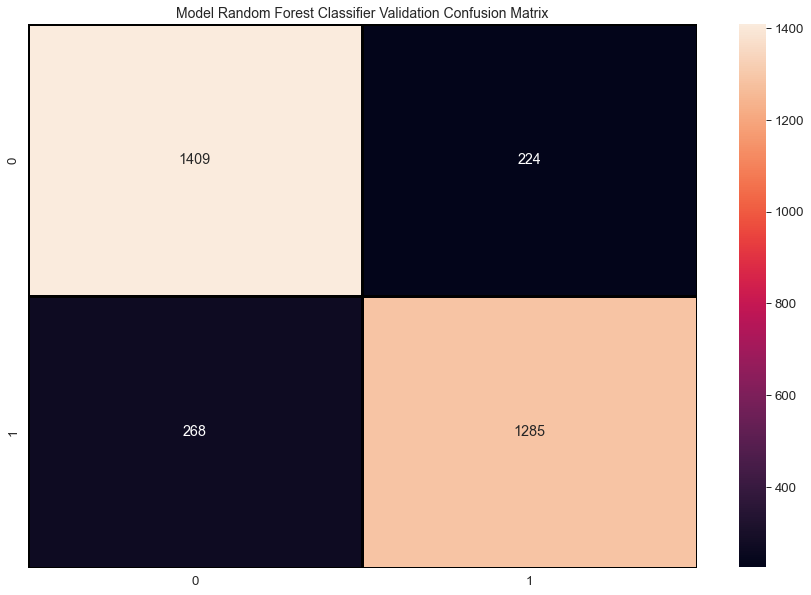

In [101]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.821     0.843     0.831      1633
           1      0.830     0.806     0.818      1553

    accuracy                          0.825      3186
   macro avg      0.825     0.824     0.825      3186
weighted avg      0.825     0.825     0.825      3186



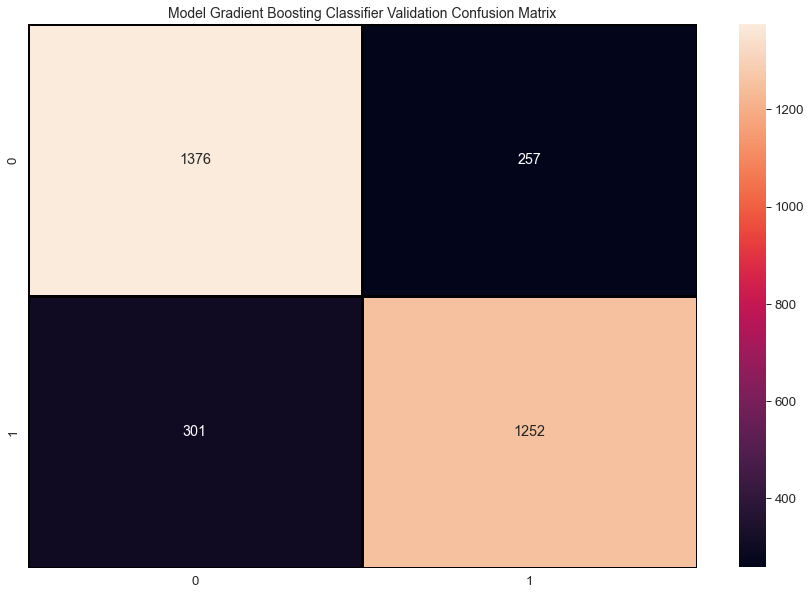

In [102]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.861     0.896     0.878      1633
           1      0.886     0.848     0.866      1553

    accuracy                          0.873      3186
   macro avg      0.873     0.872     0.872      3186
weighted avg      0.873     0.873     0.872      3186



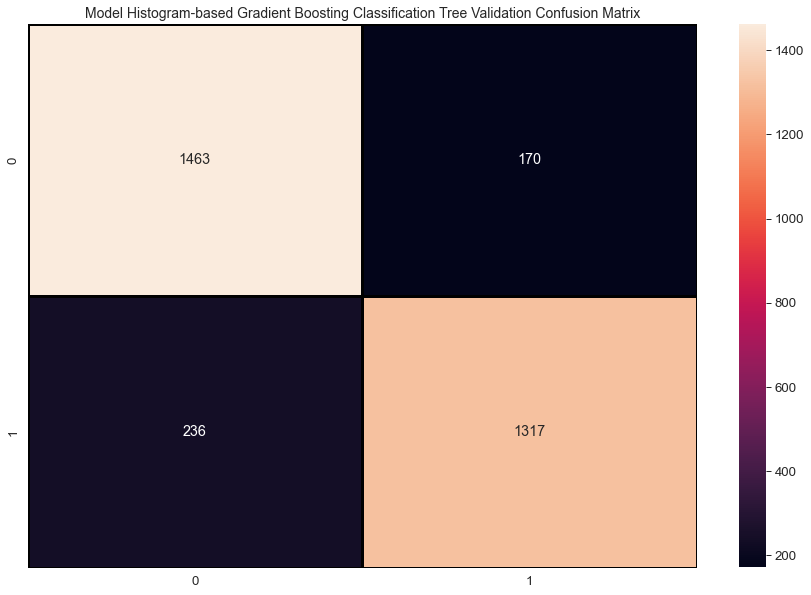

In [103]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.813     0.820     0.816      1633
           1      0.809     0.802     0.805      1553

    accuracy                          0.811      3186
   macro avg      0.811     0.811     0.811      3186
weighted avg      0.811     0.811     0.811      3186



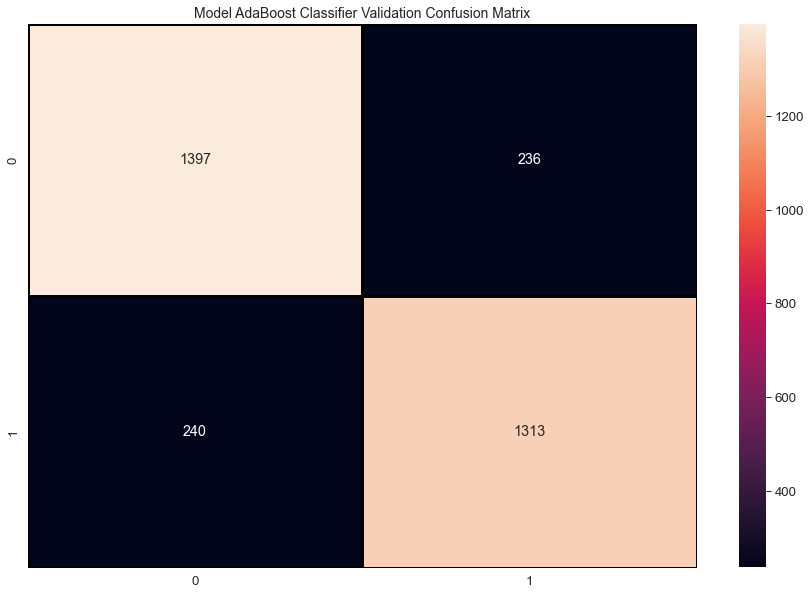

In [104]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.801     0.769     0.785      1633
           1      0.767     0.799     0.783      1553

    accuracy                          0.784      3186
   macro avg      0.784     0.784     0.784      3186
weighted avg      0.784     0.784     0.784      3186



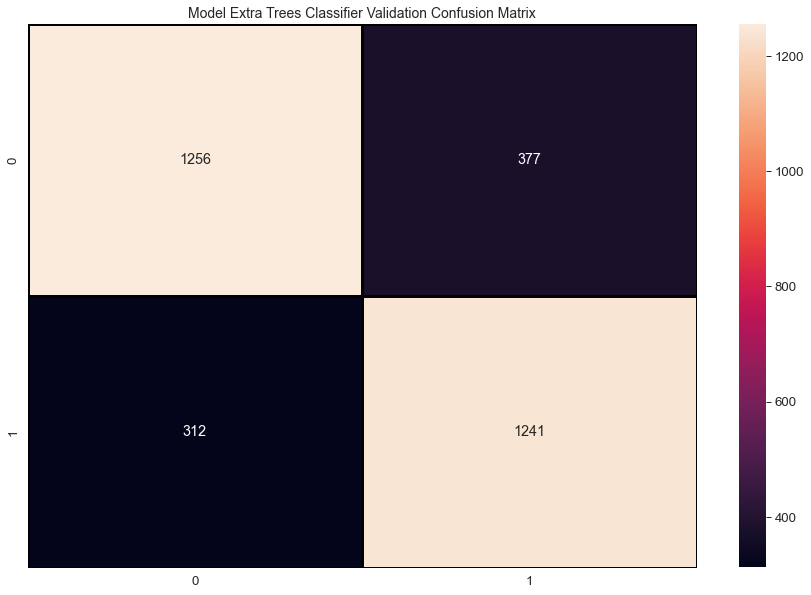

In [105]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.822     0.810     0.816      1633
           1      0.803     0.816     0.809      1553

    accuracy                          0.813      3186
   macro avg      0.813     0.813     0.813      3186
weighted avg      0.813     0.813     0.813      3186



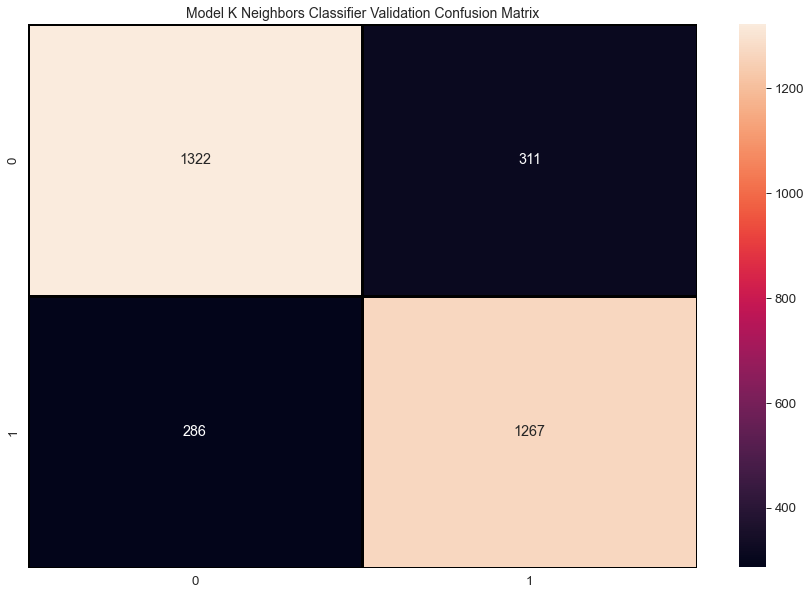

In [106]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.829     0.884     0.856      1633
           1      0.869     0.809     0.838      1553

    accuracy                          0.847      3186
   macro avg      0.849     0.846     0.847      3186
weighted avg      0.848     0.847     0.847      3186



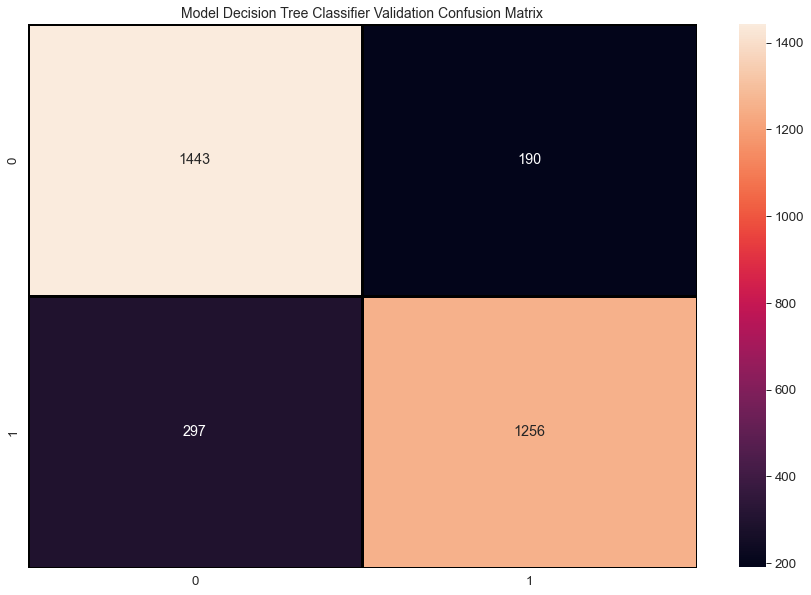

In [107]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.712     0.710     0.711      1633
           1      0.696     0.698     0.697      1553

    accuracy                          0.704      3186
   macro avg      0.704     0.704     0.704      3186
weighted avg      0.704     0.704     0.704      3186



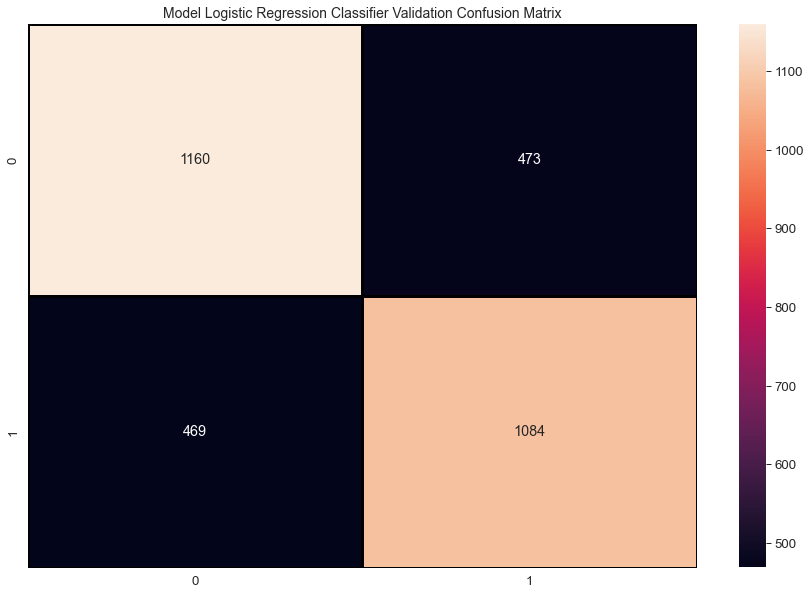

In [108]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.712     0.710     0.711      1633
           1      0.696     0.697     0.697      1553

    accuracy                          0.704      3186
   macro avg      0.704     0.704     0.704      3186
weighted avg      0.704     0.704     0.704      3186



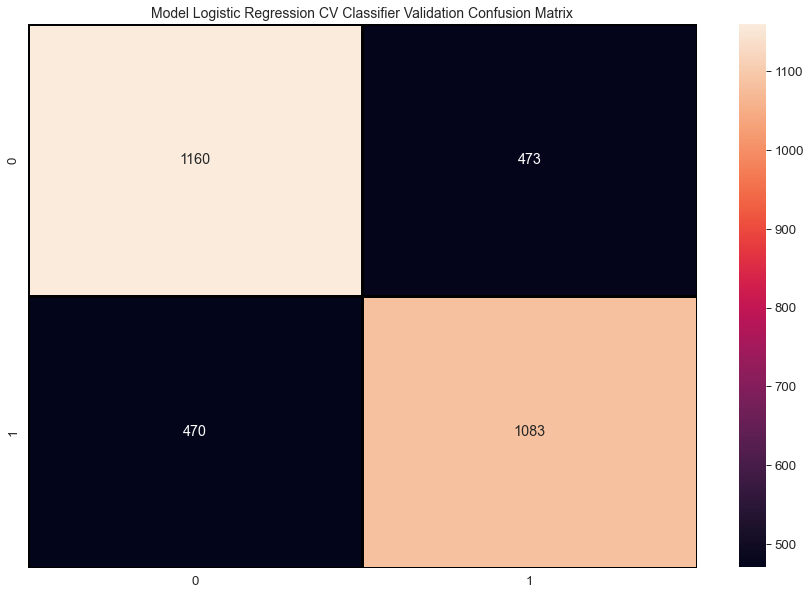

In [109]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.716     0.715     0.715      1633
           1      0.701     0.702     0.701      1553

    accuracy                          0.708      3186
   macro avg      0.708     0.708     0.708      3186
weighted avg      0.708     0.708     0.708      3186



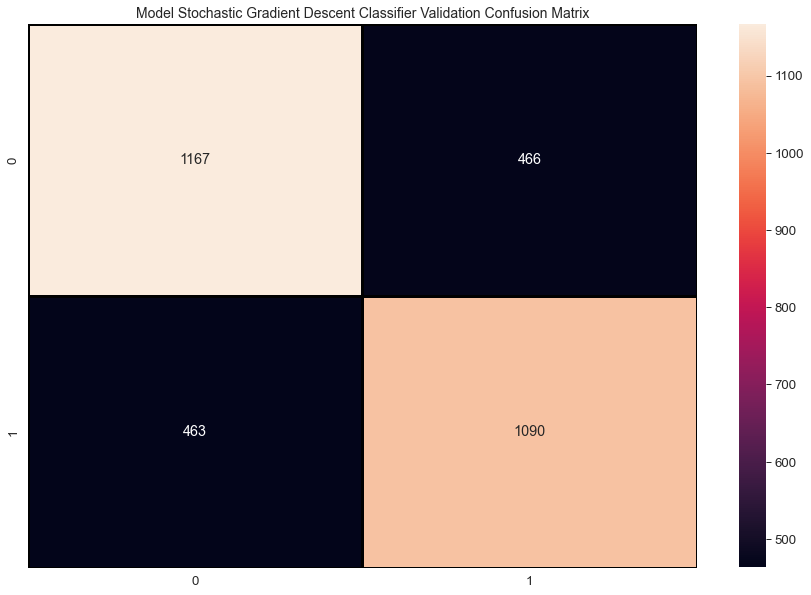

In [110]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

##### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.593     0.883     0.709      1633
           1      0.747     0.363     0.488      1553

    accuracy                          0.629      3186
   macro avg      0.670     0.623     0.599      3186
weighted avg      0.668     0.629     0.602      3186



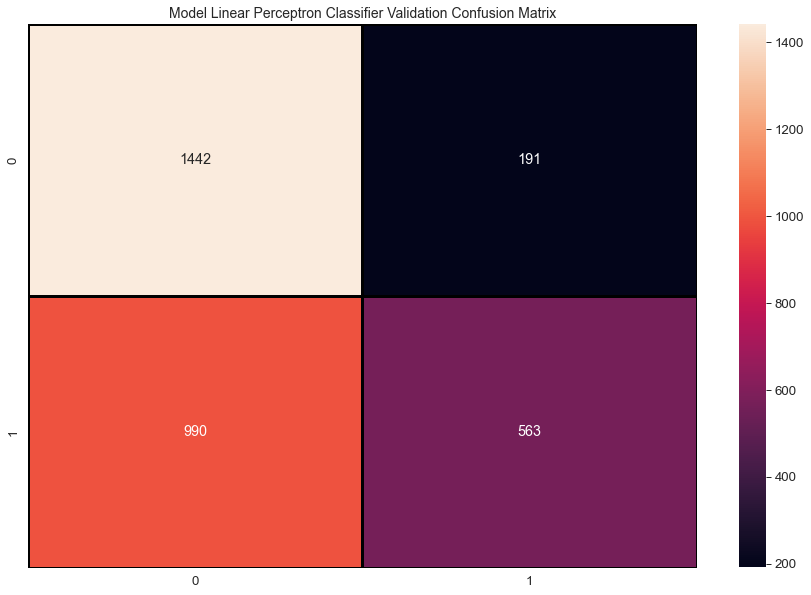

In [111]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      1.000     0.002     0.005      1633
           1      0.488     1.000     0.656      1553

    accuracy                          0.489      3186
   macro avg      0.744     0.501     0.330      3186
weighted avg      0.750     0.489     0.322      3186



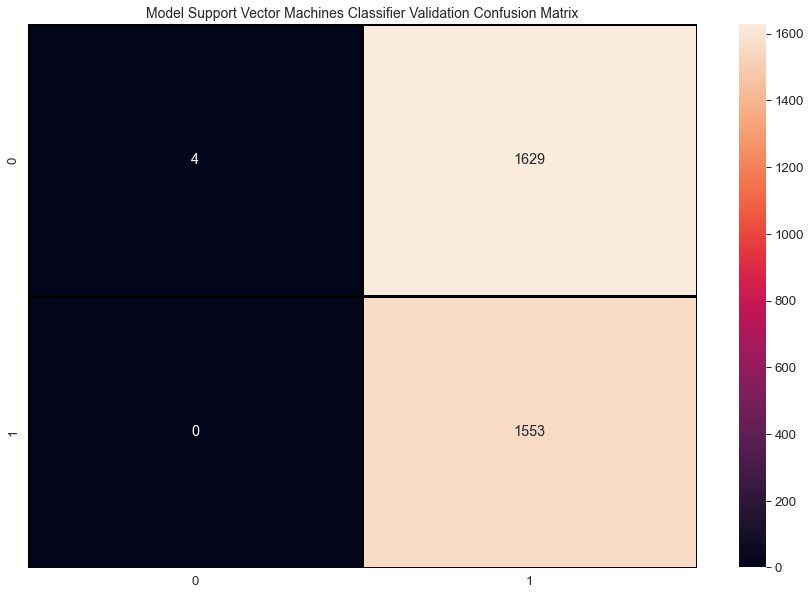

In [112]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.718     0.715     0.716      1633
           1      0.701     0.704     0.703      1553

    accuracy                          0.710      3186
   macro avg      0.709     0.710     0.710      3186
weighted avg      0.710     0.710     0.710      3186



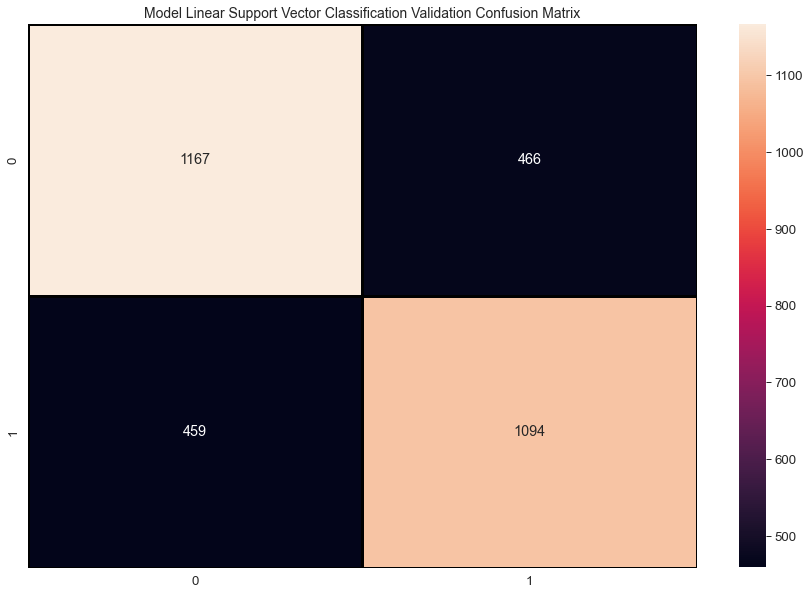

In [113]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

# 16. Accuracy Score Summary  

## Standered Machien Learning Models 

### Predication Using CPU

In [114]:
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Accuracy Standered CPU Models", ascending= False ), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Accuracy Standered CPU Models |
|----+-------------------------------------------------------+---------------------------------|
| 13 | XGBoost Classifiers                                   |                        0.895794 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                        0.867859 |
|  8 | Decision Tree Classifier                              |                        0.850282 |
|  1 | Gradient Boosting Classifier                          |                        0.837414 |
|  0 | Random Forest Classifier                              |                        0.826742 |
|  4 | Extra Trees Classifier                                |                        0.815129 |
|  3 | AdaBoost Classifier                                   |                        0.811048 |
|  5 | K Neighbors Classifier 

In [115]:
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Accuracy Standered CPU Models", ascending= True ), x = "Accuracy Standered CPU Models", y = "Standered CPU Models", title = "Machines Learning CPU Validation Accuracy")
fig.show()

The results for the Standered Machine Learning it is showing XGBoost Classifiers, Histogram-based Gradient Boosting Classification Tree, Decision Tree Classifier  with accuracy (89.5, 86.7, and 85.0) respectively.

## Machine Learning Optmization Models

### Predication Using CPU

In [116]:
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Accuracy Optimization CPU Models", ascending=False), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Accuracy Optimization CPU Models |
|----+-------------------------------------------------------+------------------------------------|
|  2 | Histogram-based Gradient Boosting Classification Tree |                           0.872567 |
|  3 | AdaBoost Classifier                                   |                           0.850596 |
|  6 | Decision Tree Classifier                              |                           0.847144 |
|  0 | Random Forest Classifier                              |                           0.845574 |
|  1 | Gradient Boosting Classifier                          |                           0.824859 |
|  5 | K Neighbors Classifier                                |                           0.812618 |
|  4 | Extra Trees Classifier                                |                           0.783741 |


In [117]:
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Accuracy Optimization CPU Models", ascending= True ), x = "Accuracy Optimization CPU Models", y = "Optimization CPU Models", title = "Machines Learning Optimization CPU Validation Accuracy")
fig.show()

The results for the Optimization Machine Learning it is showing Histogram-based Gradient Boosting Classification Tree, AdaBoost Classifier, Decision Tree Classifier with accuracy (87.2, 85.0, and 84.7) respectively.

## Compare the Machine Learning Models Accuracy 

In [118]:
cpu_ml_m_1_valid_compare = pd.DataFrame(cpu_ml_m_1_valid_compare) 

cpu_ml_op_m_1_valid_compare = pd.DataFrame(cpu_ml_op_m_1_valid_compare) 

All_ML_Accuracy_result = pd.concat([cpu_ml_m_1_valid_compare.set_index('Standered CPU Models'),
                                     cpu_ml_op_m_1_valid_compare.set_index('Optimization CPU Models')], axis=1)

All_ML_Accuracy_result = All_ML_Accuracy_result.sort_values(by="Accuracy Standered CPU Models", ascending=False)
pd.DataFrame(All_ML_Accuracy_result)

,Accuracy Standered CPU Models,Accuracy Optimization CPU Models
XGBoost Classifiers,0.896,NaN
Histogram-based Gradient Boosting Classification Tree,0.868,0.873
Decision Tree Classifier,0.850,0.847
Gradient Boosting Classifier,0.837,0.825
Random Forest Classifier,0.827,0.846
Extra Trees Classifier,0.815,0.784
AdaBoost Classifier,0.811,0.851
K Neighbors Classifier,0.808,0.813
Multilayer Perceptron Classifier,0.805,NaN
Support Vector Machines Classifiers,0.771,0.489


The table above provides information about the Accuracy Standered CPU Models vs Accuracy Optimization CPU Models. as it is showing 'Histogram-based Gradient Boosting Classification Tree', 'Random Forest Classifier', 'AdaBoost Classifier', 'K Neighbors Classifier', and 'Linear Support Vector Classification' the accuracy increased between 1% and 4% for each model.